# Compare noise2self with and without transfer learning
Test on confocal dataset;
Transfer learning setting point: trained Unet on FMD dataset. This notebook requires you have confocal data already available.

In [1]:
DATA_FOLDER = 
SIGNAL_FILE = 

In [2]:
import sys
sys.path.append("..")

from util import show, plot_images, plot_tensors, psnr
from data_loader import tiff_loader, load_confocal
import torch
import math
import json
import matplotlib.pyplot as plt

from util import getbestgpu
from mask import Masker

from models.unet import Unet
from torch.optim import Adam

from metric import frc, match_intensity, quantify, plot_quantifications
from train import train

../data_loader.py:182: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if types is 'all':


# Prepare for self-supervision training

In [5]:
device = torch.device(getbestgpu(1) if torch.cuda.is_available() else 'cpu')

In [6]:
masker = Masker(width = 4, mode='interpolate')

# Run results
performance vs sample_size

In [9]:
SIGNAL_FILE = './results/transfer-random_vs_psignal-microtubule.txt'

In [9]:
config = {
    'sample_size_list' : [10], #+ [i for i in range(5,51,5)],
    'root' : DATA_FOLDER,
    'psignal_levels' : [s for s in range(10,100,10)],
    'types' : ['microtubule'], # ['DNA', 'lysosome', 'microtubule', 'mitochondria'],
    'captures' : 1,
    'train_stat' : True,
    'patch_size' : 128,
    'batch_size' : 32,
    'n_iters' : 300,
    'repeats' : 10,
    'metrics_key' : ['mse', 'ssmi', 'frc'],
    'loss': 'mae'
}

In [10]:
FMD = {}
random = {}

Running training with 1 sample_size...
No. 0...
[9] loss: 0.10369 val_loss: 0.09737
[19] loss: 0.09766 val_loss: 0.09462
[29] loss: 0.09774 val_loss: 0.09598
[39] loss: 0.09397 val_loss: 0.09183
[49] loss: 0.09496 val_loss: 0.09182
[59] loss: 0.09562 val_loss: 0.09358
[69] loss: 0.09208 val_loss: 0.09014
[79] loss: 0.09326 val_loss: 0.09044
[89] loss: 0.09441 val_loss: 0.09230
[99] loss: 0.09074 val_loss: 0.08909
[109] loss: 0.09244 val_loss: 0.08947
[119] loss: 0.09413 val_loss: 0.09221
[129] loss: 0.09047 val_loss: 0.08858
[139] loss: 0.09123 val_loss: 0.08902
[149] loss: 0.09268 val_loss: 0.09069
[159] loss: 0.08862 val_loss: 0.08688
[169] loss: 0.08990 val_loss: 0.08759
[179] loss: 0.09136 val_loss: 0.08949
[189] loss: 0.08749 val_loss: 0.08521
[199] loss: 0.08914 val_loss: 0.08664
[209] loss: 0.09023 val_loss: 0.08902
[219] loss: 0.08584 val_loss: 0.08433
[229] loss: 0.08747 val_loss: 0.08550
[239] loss: 0.08914 val_loss: 0.08704
[249] loss: 0.08436 val_loss: 0.08229
[259] loss: 0

[69] loss: 0.09701 val_loss: 0.09763
[79] loss: 0.09455 val_loss: 0.10118
[89] loss: 0.10071 val_loss: 0.09832
[99] loss: 0.09563 val_loss: 0.09687
[109] loss: 0.09428 val_loss: 0.10118
[119] loss: 0.10012 val_loss: 0.09749
[129] loss: 0.09474 val_loss: 0.09629
[139] loss: 0.09268 val_loss: 0.10049
[149] loss: 0.10200 val_loss: 0.09746
[159] loss: 0.09419 val_loss: 0.09662
[169] loss: 0.09394 val_loss: 0.10110
[179] loss: 0.09992 val_loss: 0.09642
[189] loss: 0.09410 val_loss: 0.09625
[199] loss: 0.09183 val_loss: 0.09972
[209] loss: 0.09957 val_loss: 0.09605
[219] loss: 0.09290 val_loss: 0.09548
[229] loss: 0.09100 val_loss: 0.09939
[239] loss: 0.10032 val_loss: 0.09607
[249] loss: 0.09244 val_loss: 0.09661
[259] loss: 0.09413 val_loss: 0.10082
[269] loss: 0.09906 val_loss: 0.09531
[279] loss: 0.09232 val_loss: 0.09490
[289] loss: 0.09007 val_loss: 0.09778
[299] loss: 0.09822 val_loss: 0.09416
No. 4...
[9] loss: 0.09536 val_loss: 0.09532
[19] loss: 0.08982 val_loss: 0.09148
[29] loss:

[139] loss: 0.08513 val_loss: 0.08209
[149] loss: 0.08168 val_loss: 0.08108
[159] loss: 0.08128 val_loss: 0.08347
[169] loss: 0.08424 val_loss: 0.08161
[179] loss: 0.08075 val_loss: 0.07993
[189] loss: 0.07994 val_loss: 0.08197
[199] loss: 0.08341 val_loss: 0.08056
[209] loss: 0.07976 val_loss: 0.07904
[219] loss: 0.07877 val_loss: 0.08096
[229] loss: 0.08230 val_loss: 0.07947
[239] loss: 0.07853 val_loss: 0.07750
[249] loss: 0.07703 val_loss: 0.07887
[259] loss: 0.08134 val_loss: 0.07816
[269] loss: 0.07731 val_loss: 0.07693
[279] loss: 0.07639 val_loss: 0.07801
[289] loss: 0.08039 val_loss: 0.07754
[299] loss: 0.07662 val_loss: 0.07587
[9] loss: 0.28478 val_loss: 0.28943
[19] loss: 0.28334 val_loss: 0.28314
[29] loss: 0.12595 val_loss: 0.14836
[39] loss: 0.12645 val_loss: 0.12217
[49] loss: 0.10544 val_loss: 0.10433
[59] loss: 0.10348 val_loss: 0.10080
[69] loss: 0.09942 val_loss: 0.10481
[79] loss: 0.10244 val_loss: 0.09981
[89] loss: 0.09775 val_loss: 0.09692
[99] loss: 0.09677 val

[19] loss: 0.08858 val_loss: 0.08674
[29] loss: 0.08712 val_loss: 0.08766
[39] loss: 0.08441 val_loss: 0.08359
[49] loss: 0.08580 val_loss: 0.08396
[59] loss: 0.08475 val_loss: 0.08563
[69] loss: 0.08290 val_loss: 0.08231
[79] loss: 0.08492 val_loss: 0.08314
[89] loss: 0.08406 val_loss: 0.08492
[99] loss: 0.08235 val_loss: 0.08177
[109] loss: 0.08441 val_loss: 0.08257
[119] loss: 0.08358 val_loss: 0.08431
[129] loss: 0.08195 val_loss: 0.08153
[139] loss: 0.08413 val_loss: 0.08257
[149] loss: 0.08339 val_loss: 0.08396
[159] loss: 0.08140 val_loss: 0.08082
[169] loss: 0.08322 val_loss: 0.08173
[179] loss: 0.08244 val_loss: 0.08315
[189] loss: 0.08075 val_loss: 0.08024
[199] loss: 0.08256 val_loss: 0.08113
[209] loss: 0.08196 val_loss: 0.08270
[219] loss: 0.08062 val_loss: 0.08010
[229] loss: 0.08248 val_loss: 0.08109
[239] loss: 0.08192 val_loss: 0.08225
[249] loss: 0.08004 val_loss: 0.07938
[259] loss: 0.08144 val_loss: 0.08035
[269] loss: 0.08089 val_loss: 0.08132
[279] loss: 0.07938 v

[99] loss: 0.08782 val_loss: 0.08783
[109] loss: 0.08739 val_loss: 0.08768
[119] loss: 0.09038 val_loss: 0.08610
[129] loss: 0.08746 val_loss: 0.08735
[139] loss: 0.08710 val_loss: 0.08725
[149] loss: 0.09021 val_loss: 0.08600
[159] loss: 0.08743 val_loss: 0.08715
[169] loss: 0.08680 val_loss: 0.08715
[179] loss: 0.08989 val_loss: 0.08595
[189] loss: 0.08735 val_loss: 0.08690
[199] loss: 0.08684 val_loss: 0.08707
[209] loss: 0.08982 val_loss: 0.08589
[219] loss: 0.08782 val_loss: 0.08698
[229] loss: 0.08696 val_loss: 0.08682
[239] loss: 0.08964 val_loss: 0.08584
[249] loss: 0.08825 val_loss: 0.08912
[259] loss: 0.08738 val_loss: 0.08748
[269] loss: 0.09315 val_loss: 0.09761
[279] loss: 0.09492 val_loss: 0.08871
[289] loss: 0.08803 val_loss: 0.08797
[299] loss: 0.09054 val_loss: 0.08645
No. 5...
[9] loss: 0.08312 val_loss: 0.08199
[19] loss: 0.08258 val_loss: 0.08074
[29] loss: 0.07981 val_loss: 0.07841
[39] loss: 0.07924 val_loss: 0.07884
[49] loss: 0.08026 val_loss: 0.07856
[59] loss:

[169] loss: 0.08444 val_loss: 0.08650
[179] loss: 0.08548 val_loss: 0.08522
[189] loss: 0.08390 val_loss: 0.08331
[199] loss: 0.08364 val_loss: 0.08558
[209] loss: 0.08453 val_loss: 0.08431
[219] loss: 0.08329 val_loss: 0.08262
[229] loss: 0.08318 val_loss: 0.08493
[239] loss: 0.08374 val_loss: 0.08360
[249] loss: 0.08242 val_loss: 0.08165
[259] loss: 0.08224 val_loss: 0.08414
[269] loss: 0.08306 val_loss: 0.08310
[279] loss: 0.08198 val_loss: 0.08165
[289] loss: 0.08225 val_loss: 0.08367
[299] loss: 0.08295 val_loss: 0.08266
[9] loss: 0.28112 val_loss: 0.28419
[19] loss: 0.23731 val_loss: 0.44376
[29] loss: 0.28343 val_loss: 0.28284
[39] loss: 0.28212 val_loss: 0.28459
[49] loss: 0.28144 val_loss: 0.28299
[59] loss: 0.28338 val_loss: 0.28276
[69] loss: 0.28220 val_loss: 0.28481
[79] loss: 0.28131 val_loss: 0.28272
[89] loss: 0.28245 val_loss: 0.28161
[99] loss: 0.11713 val_loss: 0.20664
[109] loss: 0.10503 val_loss: 0.10690
[119] loss: 0.09863 val_loss: 0.10712
[129] loss: 0.10023 val

[289] loss: 0.09333 val_loss: 0.09384
[299] loss: 0.09425 val_loss: 0.09697
No. 2...
[9] loss: 0.09943 val_loss: 0.09932
[19] loss: 0.09557 val_loss: 0.09539
[29] loss: 0.09484 val_loss: 0.09394
[39] loss: 0.09364 val_loss: 0.09404
[49] loss: 0.09314 val_loss: 0.09343
[59] loss: 0.09366 val_loss: 0.09265
[69] loss: 0.09296 val_loss: 0.09329
[79] loss: 0.09244 val_loss: 0.09278
[89] loss: 0.09300 val_loss: 0.09204
[99] loss: 0.09250 val_loss: 0.09283
[109] loss: 0.09197 val_loss: 0.09228
[119] loss: 0.09250 val_loss: 0.09163
[129] loss: 0.09212 val_loss: 0.09242
[139] loss: 0.09158 val_loss: 0.09186
[149] loss: 0.09206 val_loss: 0.09125
[159] loss: 0.09174 val_loss: 0.09201
[169] loss: 0.09124 val_loss: 0.09149
[179] loss: 0.09167 val_loss: 0.09092
[189] loss: 0.09139 val_loss: 0.09161
[199] loss: 0.09096 val_loss: 0.09115
[209] loss: 0.09134 val_loss: 0.09071
[219] loss: 0.09117 val_loss: 0.09135
[229] loss: 0.09062 val_loss: 0.09088
[239] loss: 0.09104 val_loss: 0.09066
[249] loss: 0.

[169] loss: 0.08468 val_loss: 0.08386
[179] loss: 0.08440 val_loss: 0.08158
[189] loss: 0.08208 val_loss: 0.08422
[199] loss: 0.08345 val_loss: 0.08316
[209] loss: 0.08412 val_loss: 0.08149
[219] loss: 0.08187 val_loss: 0.08416
[229] loss: 0.08344 val_loss: 0.08307
[239] loss: 0.08400 val_loss: 0.08132
[249] loss: 0.08188 val_loss: 0.08401
[259] loss: 0.08330 val_loss: 0.08299
[269] loss: 0.08370 val_loss: 0.08108
[279] loss: 0.08192 val_loss: 0.08381
[289] loss: 0.08299 val_loss: 0.08296
[299] loss: 0.08354 val_loss: 0.08120
No. 6...
[9] loss: 0.09128 val_loss: 0.08850
[19] loss: 0.08948 val_loss: 0.08784
[29] loss: 0.08744 val_loss: 0.08620
[39] loss: 0.08633 val_loss: 0.08421
[49] loss: 0.08618 val_loss: 0.08574
[59] loss: 0.08555 val_loss: 0.08475
[69] loss: 0.08529 val_loss: 0.08323
[79] loss: 0.08540 val_loss: 0.08518
[89] loss: 0.08493 val_loss: 0.08417
[99] loss: 0.08488 val_loss: 0.08280
[109] loss: 0.08500 val_loss: 0.08479
[119] loss: 0.08453 val_loss: 0.08367
[129] loss: 0.

[239] loss: 0.07909 val_loss: 0.07904
[249] loss: 0.07933 val_loss: 0.08000
[259] loss: 0.07896 val_loss: 0.07823
[269] loss: 0.07888 val_loss: 0.07882
[279] loss: 0.07912 val_loss: 0.07969
[289] loss: 0.07870 val_loss: 0.07788
[299] loss: 0.07836 val_loss: 0.07820
[9] loss: 0.10005 val_loss: 0.09471
[19] loss: 0.08831 val_loss: 0.08670
[29] loss: 0.08530 val_loss: 0.08456
[39] loss: 0.08549 val_loss: 0.08574
[49] loss: 0.08392 val_loss: 0.08270
[59] loss: 0.08350 val_loss: 0.08351
[69] loss: 0.08397 val_loss: 0.08399
[79] loss: 0.08319 val_loss: 0.08188
[89] loss: 0.08295 val_loss: 0.08268
[99] loss: 0.08355 val_loss: 0.08361
[109] loss: 0.08264 val_loss: 0.08158
[119] loss: 0.08304 val_loss: 0.08291
[129] loss: 0.08404 val_loss: 0.08426
[139] loss: 0.08424 val_loss: 0.08154
[149] loss: 0.08398 val_loss: 0.08390
[159] loss: 0.08339 val_loss: 0.08335
[169] loss: 0.08403 val_loss: 0.08255
[179] loss: 0.08260 val_loss: 0.08207
[189] loss: 0.08286 val_loss: 0.08356
[199] loss: 0.08308 val

[59] loss: 0.08067 val_loss: 0.08099
[69] loss: 0.08017 val_loss: 0.08056
[79] loss: 0.08076 val_loss: 0.08058
[89] loss: 0.08018 val_loss: 0.08046
[99] loss: 0.07974 val_loss: 0.08015
[109] loss: 0.08034 val_loss: 0.08019
[119] loss: 0.07980 val_loss: 0.08007
[129] loss: 0.07938 val_loss: 0.07982
[139] loss: 0.07999 val_loss: 0.07988
[149] loss: 0.07956 val_loss: 0.07976
[159] loss: 0.07910 val_loss: 0.07954
[169] loss: 0.07973 val_loss: 0.07967
[179] loss: 0.07939 val_loss: 0.07964
[189] loss: 0.07896 val_loss: 0.07944
[199] loss: 0.07972 val_loss: 0.07958
[209] loss: 0.07918 val_loss: 0.07927
[219] loss: 0.07863 val_loss: 0.07897
[229] loss: 0.07902 val_loss: 0.07904
[239] loss: 0.07868 val_loss: 0.07882
[249] loss: 0.07822 val_loss: 0.07867
[259] loss: 0.07868 val_loss: 0.07878
[269] loss: 0.07842 val_loss: 0.07864
[279] loss: 0.07792 val_loss: 0.07855
[289] loss: 0.07859 val_loss: 0.07875
[299] loss: 0.07826 val_loss: 0.07841
[9] loss: 0.09686 val_loss: 0.09208
[19] loss: 0.08614 

[149] loss: 0.07927 val_loss: 0.07982
[159] loss: 0.07976 val_loss: 0.08064
[169] loss: 0.08064 val_loss: 0.08048
[179] loss: 0.07928 val_loss: 0.07983
[189] loss: 0.07974 val_loss: 0.08091
[199] loss: 0.08054 val_loss: 0.08024
[209] loss: 0.07978 val_loss: 0.08010
[219] loss: 0.08019 val_loss: 0.08282
[229] loss: 0.08732 val_loss: 0.08361
[239] loss: 0.08566 val_loss: 0.08066
early stopping at 250 iterations!
No. 7...
[9] loss: 0.10250 val_loss: 0.10162
[19] loss: 0.09748 val_loss: 0.09822
[29] loss: 0.09773 val_loss: 0.09655
[39] loss: 0.09680 val_loss: 0.09679
[49] loss: 0.09551 val_loss: 0.09638
[59] loss: 0.09662 val_loss: 0.09539
[69] loss: 0.09609 val_loss: 0.09613
[79] loss: 0.09479 val_loss: 0.09583
[89] loss: 0.09613 val_loss: 0.09485
[99] loss: 0.09570 val_loss: 0.09573
[109] loss: 0.09440 val_loss: 0.09546
[119] loss: 0.09578 val_loss: 0.09450
[129] loss: 0.09539 val_loss: 0.09540
[139] loss: 0.09411 val_loss: 0.09518
[149] loss: 0.09546 val_loss: 0.09420
[159] loss: 0.0951

[259] loss: 0.08411 val_loss: 0.08273
[269] loss: 0.08318 val_loss: 0.08304
[279] loss: 0.08173 val_loss: 0.08300
[289] loss: 0.08375 val_loss: 0.08246
[299] loss: 0.08292 val_loss: 0.08287
[9] loss: 0.15134 val_loss: 0.11549
[19] loss: 0.10015 val_loss: 0.09499
[29] loss: 0.10213 val_loss: 0.09345
[39] loss: 0.09267 val_loss: 0.09563
[49] loss: 0.09202 val_loss: 0.08923
[59] loss: 0.09662 val_loss: 0.09118
[69] loss: 0.08631 val_loss: 0.08875
[79] loss: 0.09037 val_loss: 0.08776
[89] loss: 0.09391 val_loss: 0.08712
[99] loss: 0.08624 val_loss: 0.08665
[109] loss: 0.08699 val_loss: 0.08564
[119] loss: 0.09309 val_loss: 0.08654
[129] loss: 0.08424 val_loss: 0.08562
[139] loss: 0.08708 val_loss: 0.08500
[149] loss: 0.09274 val_loss: 0.08643
[159] loss: 0.08415 val_loss: 0.08549
[169] loss: 0.08649 val_loss: 0.08507
[179] loss: 0.09214 val_loss: 0.08552
[189] loss: 0.08406 val_loss: 0.08523
[199] loss: 0.08615 val_loss: 0.08487
[209] loss: 0.09092 val_loss: 0.08517
[219] loss: 0.08419 val

[29] loss: 0.07932 val_loss: 0.07875
[39] loss: 0.07913 val_loss: 0.07927
[49] loss: 0.08002 val_loss: 0.07891
[59] loss: 0.07795 val_loss: 0.07772
[69] loss: 0.07818 val_loss: 0.07853
[79] loss: 0.07952 val_loss: 0.07842
[89] loss: 0.07756 val_loss: 0.07732
[99] loss: 0.07783 val_loss: 0.07821
[109] loss: 0.07919 val_loss: 0.07810
[119] loss: 0.07725 val_loss: 0.07704
[129] loss: 0.07758 val_loss: 0.07796
[139] loss: 0.07897 val_loss: 0.07787
[149] loss: 0.07702 val_loss: 0.07683
[159] loss: 0.07733 val_loss: 0.07777
[169] loss: 0.07872 val_loss: 0.07771
[179] loss: 0.07688 val_loss: 0.07671
[189] loss: 0.07733 val_loss: 0.07769
[199] loss: 0.07865 val_loss: 0.07751
[209] loss: 0.07667 val_loss: 0.07641
[219] loss: 0.07693 val_loss: 0.07739
[229] loss: 0.07830 val_loss: 0.07729
[239] loss: 0.07651 val_loss: 0.07626
[249] loss: 0.07679 val_loss: 0.07725
[259] loss: 0.07806 val_loss: 0.07701
[269] loss: 0.07623 val_loss: 0.07593
[279] loss: 0.07644 val_loss: 0.07691
[289] loss: 0.07774 

[189] loss: 0.08305 val_loss: 0.07938
[199] loss: 0.07973 val_loss: 0.07952
[209] loss: 0.07867 val_loss: 0.07918
[219] loss: 0.07894 val_loss: 0.07842
[229] loss: 0.07908 val_loss: 0.07910
[239] loss: 0.07868 val_loss: 0.07796
[249] loss: 0.07873 val_loss: 0.07781
[259] loss: 0.07900 val_loss: 0.07897
[269] loss: 0.07865 val_loss: 0.07789
[279] loss: 0.07860 val_loss: 0.07777
[289] loss: 0.07898 val_loss: 0.07892
[299] loss: 0.07864 val_loss: 0.07783
No. 8...
[9] loss: 0.08325 val_loss: 0.08180
[19] loss: 0.08073 val_loss: 0.07983
[29] loss: 0.08003 val_loss: 0.07996
[39] loss: 0.07921 val_loss: 0.07819
[49] loss: 0.07870 val_loss: 0.07801
[59] loss: 0.07896 val_loss: 0.07883
[69] loss: 0.07857 val_loss: 0.07753
[79] loss: 0.07811 val_loss: 0.07748
[89] loss: 0.07853 val_loss: 0.07832
[99] loss: 0.07825 val_loss: 0.07719
[109] loss: 0.07772 val_loss: 0.07713
[119] loss: 0.07819 val_loss: 0.07798
[129] loss: 0.07797 val_loss: 0.07693
[139] loss: 0.07741 val_loss: 0.07683
[149] loss: 0.

[249] loss: 0.08364 val_loss: 0.08326
[259] loss: 0.08321 val_loss: 0.08325
[269] loss: 0.08346 val_loss: 0.08426
[279] loss: 0.08341 val_loss: 0.08308
[289] loss: 0.08305 val_loss: 0.08318
[299] loss: 0.08348 val_loss: 0.08419
[9] loss: 0.15347 val_loss: 0.14336
[19] loss: 0.11150 val_loss: 0.10773
[29] loss: 0.09455 val_loss: 0.10205
[39] loss: 0.08996 val_loss: 0.08862
[49] loss: 0.09476 val_loss: 0.09086
[59] loss: 0.08720 val_loss: 0.09848
[69] loss: 0.08810 val_loss: 0.08628
[79] loss: 0.09104 val_loss: 0.08788
[89] loss: 0.08668 val_loss: 0.09583
[99] loss: 0.08661 val_loss: 0.08596
[109] loss: 0.08881 val_loss: 0.08584
[119] loss: 0.08629 val_loss: 0.09432
[129] loss: 0.08611 val_loss: 0.08568
[139] loss: 0.08698 val_loss: 0.08548
[149] loss: 0.08598 val_loss: 0.09261
[159] loss: 0.08632 val_loss: 0.08549
[169] loss: 0.08573 val_loss: 0.08578
[179] loss: 0.08659 val_loss: 0.08985
[189] loss: 0.08585 val_loss: 0.08525
[199] loss: 0.08607 val_loss: 0.08652
[209] loss: 0.08880 val

[19] loss: 0.08836 val_loss: 0.08750
[29] loss: 0.08646 val_loss: 0.08696
[39] loss: 0.08503 val_loss: 0.08508
[49] loss: 0.08490 val_loss: 0.08458
[59] loss: 0.08530 val_loss: 0.08578
[69] loss: 0.08428 val_loss: 0.08438
[79] loss: 0.08439 val_loss: 0.08415
[89] loss: 0.08488 val_loss: 0.08535
[99] loss: 0.08397 val_loss: 0.08408
[109] loss: 0.08412 val_loss: 0.08386
[119] loss: 0.08461 val_loss: 0.08508
[129] loss: 0.08375 val_loss: 0.08383
[139] loss: 0.08389 val_loss: 0.08364
[149] loss: 0.08439 val_loss: 0.08485
[159] loss: 0.08353 val_loss: 0.08361
[169] loss: 0.08370 val_loss: 0.08350
[179] loss: 0.08429 val_loss: 0.08475
[189] loss: 0.08346 val_loss: 0.08353
[199] loss: 0.08351 val_loss: 0.08332
[209] loss: 0.08403 val_loss: 0.08451
[219] loss: 0.08322 val_loss: 0.08325
[229] loss: 0.08325 val_loss: 0.08313
[239] loss: 0.08378 val_loss: 0.08427
[249] loss: 0.08297 val_loss: 0.08305
[259] loss: 0.08307 val_loss: 0.08306
[269] loss: 0.08374 val_loss: 0.08423
[279] loss: 0.08287 v

[99] loss: 0.10030 val_loss: 0.09923
[109] loss: 0.10135 val_loss: 0.09568
[119] loss: 0.09484 val_loss: 0.10056
[129] loss: 0.09342 val_loss: 0.09758
[139] loss: 0.10069 val_loss: 0.09405
[149] loss: 0.09447 val_loss: 0.10528
[159] loss: 0.09938 val_loss: 0.09494
[169] loss: 0.09825 val_loss: 0.09410
[179] loss: 0.09349 val_loss: 0.09910
[189] loss: 0.09287 val_loss: 0.09291
[199] loss: 0.09765 val_loss: 0.09349
[209] loss: 0.09325 val_loss: 0.09893
[219] loss: 0.09230 val_loss: 0.09267
[229] loss: 0.09743 val_loss: 0.09314
[239] loss: 0.09271 val_loss: 0.09866
[249] loss: 0.09214 val_loss: 0.09253
[259] loss: 0.09732 val_loss: 0.09301
[269] loss: 0.09247 val_loss: 0.09852
[279] loss: 0.09200 val_loss: 0.09245
[289] loss: 0.09719 val_loss: 0.09288
[299] loss: 0.09226 val_loss: 0.09842
No. 9...
[9] loss: 0.09111 val_loss: 0.09104
[19] loss: 0.08854 val_loss: 0.08867
[29] loss: 0.08664 val_loss: 0.08683
[39] loss: 0.08627 val_loss: 0.08666
[49] loss: 0.08522 val_loss: 0.08625
[59] loss:

[159] loss: 0.08278 val_loss: 0.08278
[169] loss: 0.08336 val_loss: 0.08366
[179] loss: 0.08318 val_loss: 0.08255
[189] loss: 0.08262 val_loss: 0.08262
[199] loss: 0.08317 val_loss: 0.08350
[209] loss: 0.08303 val_loss: 0.08238
[219] loss: 0.08247 val_loss: 0.08252
[229] loss: 0.08303 val_loss: 0.08339
[239] loss: 0.08282 val_loss: 0.08221
[249] loss: 0.08231 val_loss: 0.08236
[259] loss: 0.08295 val_loss: 0.08327
[269] loss: 0.08272 val_loss: 0.08205
[279] loss: 0.08209 val_loss: 0.08208
[289] loss: 0.08263 val_loss: 0.08297
[299] loss: 0.08246 val_loss: 0.08184
[9] loss: 0.11890 val_loss: 0.11597
[19] loss: 0.10740 val_loss: 0.10525
[29] loss: 0.09884 val_loss: 0.09852
[39] loss: 0.08819 val_loss: 0.08869
[49] loss: 0.08596 val_loss: 0.08660
[59] loss: 0.08540 val_loss: 0.08466
[69] loss: 0.08432 val_loss: 0.08479
[79] loss: 0.08499 val_loss: 0.08482
[89] loss: 0.08539 val_loss: 0.08470
[99] loss: 0.08407 val_loss: 0.08430
[109] loss: 0.08507 val_loss: 0.08578
[119] loss: 0.08729 val

[229] loss: 0.08179 val_loss: 0.08132
[239] loss: 0.08120 val_loss: 0.08233
[249] loss: 0.08069 val_loss: 0.07968
[259] loss: 0.08200 val_loss: 0.08101
[269] loss: 0.08122 val_loss: 0.08303
[279] loss: 0.08136 val_loss: 0.07972
[289] loss: 0.08153 val_loss: 0.08111
[299] loss: 0.08125 val_loss: 0.08302
No. 6...
[9] loss: 0.09852 val_loss: 0.09705
[19] loss: 0.09576 val_loss: 0.09389
[29] loss: 0.09361 val_loss: 0.09337
[39] loss: 0.09371 val_loss: 0.09273
[49] loss: 0.09411 val_loss: 0.09255
[59] loss: 0.09264 val_loss: 0.09233
[69] loss: 0.09308 val_loss: 0.09216
[79] loss: 0.09359 val_loss: 0.09211
[89] loss: 0.09225 val_loss: 0.09191
[99] loss: 0.09276 val_loss: 0.09185
[109] loss: 0.09329 val_loss: 0.09182
[119] loss: 0.09197 val_loss: 0.09162
[129] loss: 0.09250 val_loss: 0.09159
[139] loss: 0.09305 val_loss: 0.09159
[149] loss: 0.09174 val_loss: 0.09138
[159] loss: 0.09229 val_loss: 0.09137
[169] loss: 0.09283 val_loss: 0.09137
[179] loss: 0.09156 val_loss: 0.09118
[189] loss: 0.

[9] loss: 0.11358 val_loss: 0.10426
[19] loss: 0.09367 val_loss: 0.09721
[29] loss: 0.08655 val_loss: 0.08936
[39] loss: 0.08664 val_loss: 0.08603
[49] loss: 0.08447 val_loss: 0.08567
[59] loss: 0.08349 val_loss: 0.08511
[69] loss: 0.08385 val_loss: 0.08341
[79] loss: 0.08720 val_loss: 0.08628
[89] loss: 0.08498 val_loss: 0.08498
[99] loss: 0.08367 val_loss: 0.08300
[109] loss: 0.08286 val_loss: 0.08355
[119] loss: 0.08202 val_loss: 0.08378
[129] loss: 0.08254 val_loss: 0.08205
[139] loss: 0.08256 val_loss: 0.08307
[149] loss: 0.08195 val_loss: 0.08396
[159] loss: 0.08255 val_loss: 0.08182
[169] loss: 0.08261 val_loss: 0.08344
[179] loss: 0.08177 val_loss: 0.08404
[189] loss: 0.08261 val_loss: 0.08185
[199] loss: 0.08260 val_loss: 0.08409
[209] loss: 0.08187 val_loss: 0.08437
[219] loss: 0.08325 val_loss: 0.08232
[229] loss: 0.08214 val_loss: 0.08274
[239] loss: 0.08145 val_loss: 0.08349
[249] loss: 0.08239 val_loss: 0.08156
[259] loss: 0.08210 val_loss: 0.08251
[269] loss: 0.08152 val

[89] loss: 0.09569 val_loss: 0.08990
[99] loss: 0.08020 val_loss: 0.07783
[109] loss: 0.07574 val_loss: 0.07516
[119] loss: 0.07859 val_loss: 0.08037
[129] loss: 0.08630 val_loss: 0.08572
[139] loss: 0.07465 val_loss: 0.07026
[149] loss: 0.07707 val_loss: 0.08193
[159] loss: 0.07624 val_loss: 0.07419
[169] loss: 0.07058 val_loss: 0.07088
[179] loss: 0.08435 val_loss: 0.07930
[189] loss: 0.07826 val_loss: 0.07748
[199] loss: 0.09572 val_loss: 0.09872
[209] loss: 0.08178 val_loss: 0.08033
[219] loss: 0.07965 val_loss: 0.07791
[229] loss: 0.06633 val_loss: 0.06675
[239] loss: 0.07800 val_loss: 0.07631
[249] loss: 0.07476 val_loss: 0.07499
[259] loss: 0.06766 val_loss: 0.06609
[269] loss: 0.09430 val_loss: 0.09761
[279] loss: 0.08087 val_loss: 0.07735
[289] loss: 0.07958 val_loss: 0.08987
[299] loss: 0.08417 val_loss: 0.07658
[309] loss: 0.08214 val_loss: 0.08343
[319] loss: 0.08020 val_loss: 0.08253
[329] loss: 0.07494 val_loss: 0.07637
[339] loss: 0.08147 val_loss: 0.08110
[349] loss: 0.

[129] loss: 0.07766 val_loss: 0.07537
[139] loss: 0.07935 val_loss: 0.07582
[149] loss: 0.08879 val_loss: 0.08708
[159] loss: 0.08122 val_loss: 0.08245
[169] loss: 0.08488 val_loss: 0.08796
[179] loss: 0.08161 val_loss: 0.07911
[189] loss: 0.09292 val_loss: 0.09302
[199] loss: 0.09677 val_loss: 0.09700
[209] loss: 0.08813 val_loss: 0.08959
[219] loss: 0.07997 val_loss: 0.07867
early stopping at 230 iterations!
No. 8...
[9] loss: 0.08527 val_loss: 0.08510
[19] loss: 0.08720 val_loss: 0.08681
[29] loss: 0.09155 val_loss: 0.09333
[39] loss: 0.07949 val_loss: 0.07820
[49] loss: 0.09225 val_loss: 0.09032
[59] loss: 0.08352 val_loss: 0.08743
[69] loss: 0.08747 val_loss: 0.08905
[79] loss: 0.08352 val_loss: 0.08191
[89] loss: 0.09351 val_loss: 0.09085
[99] loss: 0.08882 val_loss: 0.08865
[109] loss: 0.08952 val_loss: 0.08818
[119] loss: 0.08152 val_loss: 0.08433
[129] loss: 0.08209 val_loss: 0.08123
early stopping at 140 iterations!
[9] loss: 0.09396 val_loss: 0.11043
[19] loss: 0.09305 val_l

[169] loss: 0.08948 val_loss: 0.09030
[179] loss: 0.09314 val_loss: 0.09060
[189] loss: 0.09007 val_loss: 0.08788
[199] loss: 0.09145 val_loss: 0.09282
[209] loss: 0.09132 val_loss: 0.09371
[219] loss: 0.09254 val_loss: 0.08961
[229] loss: 0.09260 val_loss: 0.09167
[239] loss: 0.08978 val_loss: 0.09219
[249] loss: 0.09248 val_loss: 0.09083
[259] loss: 0.08863 val_loss: 0.08976
[269] loss: 0.09265 val_loss: 0.09249
[279] loss: 0.09386 val_loss: 0.09331
early stopping at 290 iterations!
[9] loss: 0.10665 val_loss: 0.10664
[19] loss: 0.09624 val_loss: 0.09569
[29] loss: 0.09738 val_loss: 0.09779
[39] loss: 0.09141 val_loss: 0.09242
[49] loss: 0.09450 val_loss: 0.09586
[59] loss: 0.09467 val_loss: 0.09408
[69] loss: 0.09177 val_loss: 0.09094
[79] loss: 0.09227 val_loss: 0.09311
[89] loss: 0.09335 val_loss: 0.09343
[99] loss: 0.09394 val_loss: 0.09449
[109] loss: 0.09097 val_loss: 0.09125
[119] loss: 0.09695 val_loss: 0.09244
[129] loss: 0.09237 val_loss: 0.09177
[139] loss: 0.09286 val_los

[89] loss: 0.07893 val_loss: 0.07661
[99] loss: 0.08123 val_loss: 0.08067
[109] loss: 0.07729 val_loss: 0.07399
[119] loss: 0.08079 val_loss: 0.07918
[129] loss: 0.07475 val_loss: 0.07975
[139] loss: 0.07837 val_loss: 0.07349
[149] loss: 0.08492 val_loss: 0.09874
[159] loss: 0.10482 val_loss: 0.09094
[169] loss: 0.08149 val_loss: 0.07939
[179] loss: 0.08562 val_loss: 0.08594
[189] loss: 0.08473 val_loss: 0.08445
[199] loss: 0.08285 val_loss: 0.08412
[209] loss: 0.07830 val_loss: 0.07952
[219] loss: 0.08399 val_loss: 0.08703
[229] loss: 0.07513 val_loss: 0.07455
early stopping at 240 iterations!
No. 8...
[9] loss: 0.10041 val_loss: 0.09838
[19] loss: 0.09839 val_loss: 0.09684
[29] loss: 0.09339 val_loss: 0.09160
[39] loss: 0.08702 val_loss: 0.08724
[49] loss: 0.09550 val_loss: 0.09410
[59] loss: 0.09074 val_loss: 0.08801
[69] loss: 0.09281 val_loss: 0.09052
[79] loss: 0.08991 val_loss: 0.08921
[89] loss: 0.09436 val_loss: 0.09354
[99] loss: 0.08754 val_loss: 0.08748
[109] loss: 0.09204 

[189] loss: 0.07756 val_loss: 0.07800
[199] loss: 0.08236 val_loss: 0.08270
[209] loss: 0.07385 val_loss: 0.07390
[219] loss: 0.08457 val_loss: 0.08577
[229] loss: 0.08166 val_loss: 0.08190
[239] loss: 0.07952 val_loss: 0.08005
[249] loss: 0.07512 val_loss: 0.07533
[259] loss: 0.07948 val_loss: 0.07913
[269] loss: 0.07726 val_loss: 0.07635
early stopping at 280 iterations!
[9] loss: 0.10271 val_loss: 0.10131
[19] loss: 0.08350 val_loss: 0.08218
[29] loss: 0.08319 val_loss: 0.08475
[39] loss: 0.08107 val_loss: 0.08133
[49] loss: 0.07525 val_loss: 0.07611
[59] loss: 0.07950 val_loss: 0.07974
[69] loss: 0.08223 val_loss: 0.08381
[79] loss: 0.08107 val_loss: 0.08202
[89] loss: 0.07985 val_loss: 0.07953
[99] loss: 0.08149 val_loss: 0.08114
[109] loss: 0.08266 val_loss: 0.08234
[119] loss: 0.08433 val_loss: 0.08335
[129] loss: 0.08580 val_loss: 0.08586
[139] loss: 0.07994 val_loss: 0.07953
early stopping at 150 iterations!
No. 3...
[9] loss: 0.08802 val_loss: 0.08750
[19] loss: 0.08829 val_l

[149] loss: 0.07990 val_loss: 0.07919
[159] loss: 0.08496 val_loss: 0.08440
[169] loss: 0.08002 val_loss: 0.07847
[179] loss: 0.07723 val_loss: 0.07993
[189] loss: 0.08310 val_loss: 0.08335
[199] loss: 0.08342 val_loss: 0.08235
[209] loss: 0.07931 val_loss: 0.07976
[219] loss: 0.08054 val_loss: 0.08092
[229] loss: 0.07984 val_loss: 0.07908
[239] loss: 0.08107 val_loss: 0.08263
[249] loss: 0.08019 val_loss: 0.07975
[259] loss: 0.07779 val_loss: 0.07807
[269] loss: 0.07733 val_loss: 0.07933
[279] loss: 0.08029 val_loss: 0.07983
[289] loss: 0.08069 val_loss: 0.08021
[299] loss: 0.07575 val_loss: 0.07654
[309] loss: 0.08066 val_loss: 0.07986
[319] loss: 0.07884 val_loss: 0.07742
[329] loss: 0.08309 val_loss: 0.08403
[339] loss: 0.08397 val_loss: 0.08458
[349] loss: 0.08181 val_loss: 0.08062
[359] loss: 0.08017 val_loss: 0.08009
[369] loss: 0.08349 val_loss: 0.08517
[379] loss: 0.08171 val_loss: 0.07917
[389] loss: 0.08014 val_loss: 0.08146
early stopping at 400 iterations!
No. 8...
[9] los

../util.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, width, sharex='col', sharey='row', figsize=(width * 4, 4))
/home/yina/envs/n2s/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


No. 1...
[9] loss: 0.08563 val_loss: 0.08519
[19] loss: 0.08971 val_loss: 0.08947
[29] loss: 0.08883 val_loss: 0.08916
[39] loss: 0.08510 val_loss: 0.08484
[49] loss: 0.08976 val_loss: 0.08883
[59] loss: 0.08477 val_loss: 0.08440
[69] loss: 0.08697 val_loss: 0.08666
[79] loss: 0.07763 val_loss: 0.07753
[89] loss: 0.08239 val_loss: 0.08317
[99] loss: 0.08205 val_loss: 0.08344
[109] loss: 0.07957 val_loss: 0.07988
[119] loss: 0.08179 val_loss: 0.08138
[129] loss: 0.08660 val_loss: 0.08710
[139] loss: 0.08686 val_loss: 0.08593
[149] loss: 0.08051 val_loss: 0.08111
[159] loss: 0.08338 val_loss: 0.08314
[169] loss: 0.08281 val_loss: 0.08229
early stopping at 180 iterations!
[9] loss: 0.10497 val_loss: 0.09236
[19] loss: 0.09007 val_loss: 0.09052
[29] loss: 0.09017 val_loss: 0.08815
[39] loss: 0.08917 val_loss: 0.08855
[49] loss: 0.08363 val_loss: 0.08371
[59] loss: 0.08653 val_loss: 0.08978
[69] loss: 0.08574 val_loss: 0.08599
[79] loss: 0.08920 val_loss: 0.08913
[89] loss: 0.08451 val_loss

[199] loss: 0.08455 val_loss: 0.08410
[209] loss: 0.08365 val_loss: 0.08299
[219] loss: 0.08227 val_loss: 0.08331
[229] loss: 0.08594 val_loss: 0.08492
early stopping at 240 iterations!
[9] loss: 0.26473 val_loss: 0.25397
[19] loss: 0.10320 val_loss: 0.10647
[29] loss: 0.10039 val_loss: 0.09369
[39] loss: 0.09373 val_loss: 0.09505
[49] loss: 0.08708 val_loss: 0.08638
[59] loss: 0.09466 val_loss: 0.08632
[69] loss: 0.08516 val_loss: 0.08905
[79] loss: 0.08539 val_loss: 0.08391
[89] loss: 0.09570 val_loss: 0.08739
[99] loss: 0.08567 val_loss: 0.08773
[109] loss: 0.08498 val_loss: 0.08285
[119] loss: 0.08836 val_loss: 0.08267
[129] loss: 0.08724 val_loss: 0.08811
[139] loss: 0.08568 val_loss: 0.08400
[149] loss: 0.08796 val_loss: 0.08145
[159] loss: 0.08302 val_loss: 0.08237
[169] loss: 0.08401 val_loss: 0.08148
[179] loss: 0.09002 val_loss: 0.08548
[189] loss: 0.08222 val_loss: 0.08201
[199] loss: 0.08493 val_loss: 0.08412
[209] loss: 0.08792 val_loss: 0.08420
[219] loss: 0.08269 val_los

[349] loss: 0.08513 val_loss: 0.08601
[359] loss: 0.08565 val_loss: 0.08466
early stopping at 370 iterations!
[9] loss: 0.10076 val_loss: 0.09616
[19] loss: 0.09702 val_loss: 0.09941
[29] loss: 0.09278 val_loss: 0.09336
[39] loss: 0.09397 val_loss: 0.09127
[49] loss: 0.09072 val_loss: 0.09064
[59] loss: 0.08661 val_loss: 0.08861
[69] loss: 0.09181 val_loss: 0.08991
[79] loss: 0.09308 val_loss: 0.09155
[89] loss: 0.09078 val_loss: 0.08955
[99] loss: 0.09169 val_loss: 0.08943
[109] loss: 0.08546 val_loss: 0.08523
[119] loss: 0.09232 val_loss: 0.09043
[129] loss: 0.08792 val_loss: 0.09079
[139] loss: 0.10878 val_loss: 0.09902
[149] loss: 0.09330 val_loss: 0.08764
[159] loss: 0.08800 val_loss: 0.08701
[169] loss: 0.08334 val_loss: 0.08416
[179] loss: 0.08907 val_loss: 0.08797
[189] loss: 0.08860 val_loss: 0.08761
[199] loss: 0.08663 val_loss: 0.08751
[209] loss: 0.09060 val_loss: 0.08999
[219] loss: 0.08984 val_loss: 0.08797
[229] loss: 0.08701 val_loss: 0.08741
[239] loss: 0.08750 val_los

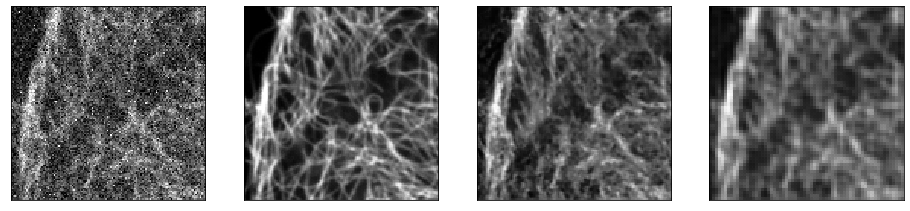

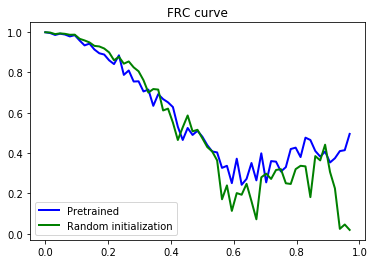

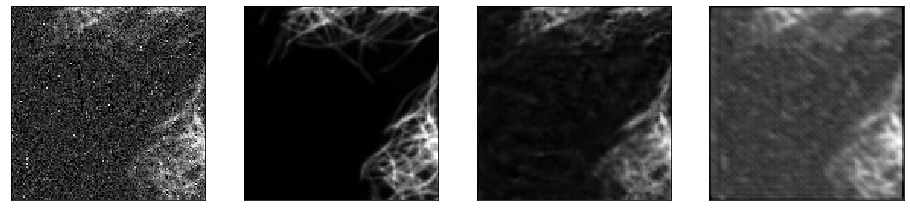

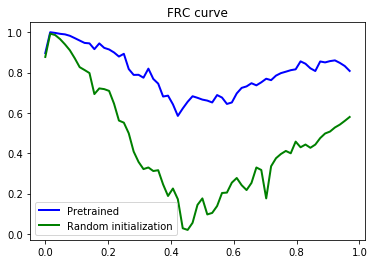

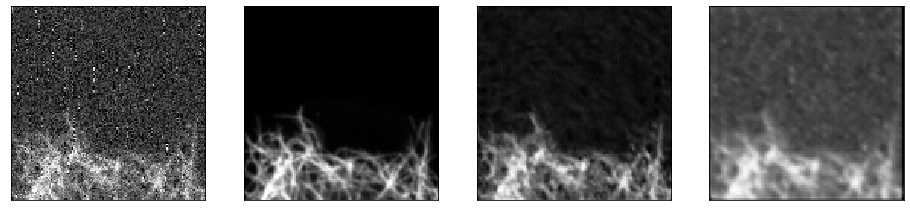

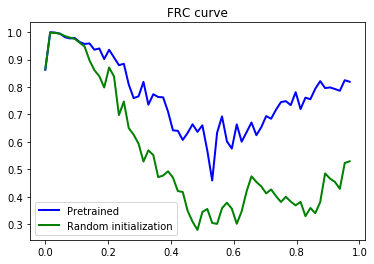

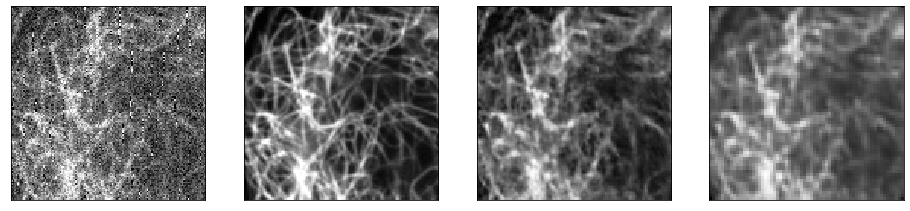

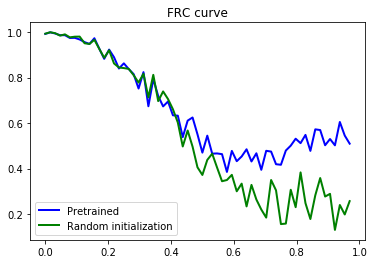

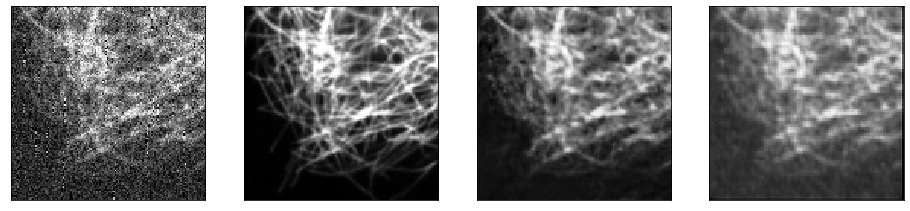

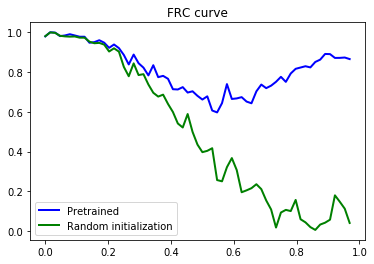

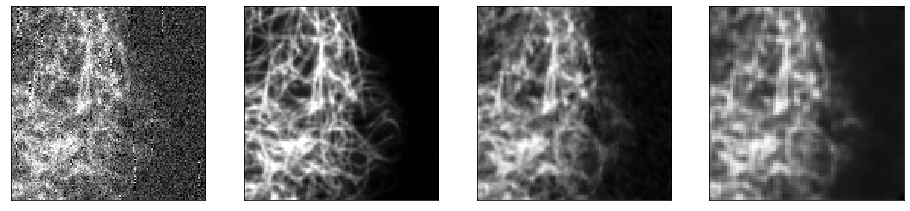

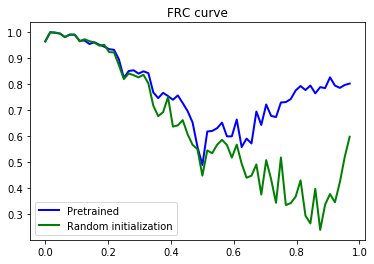

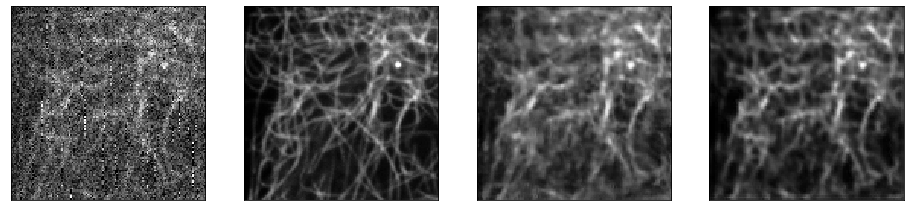

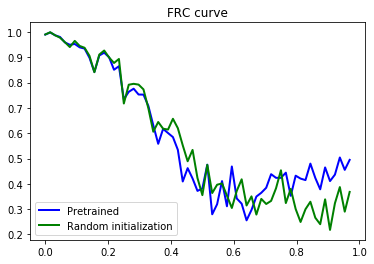

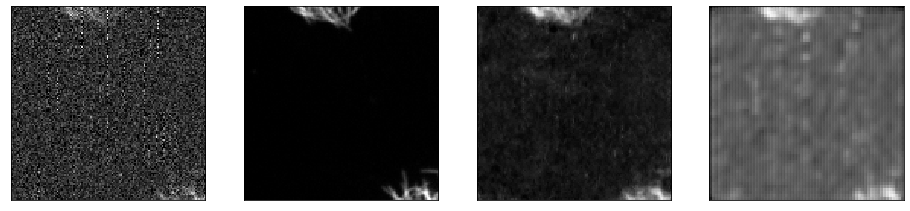

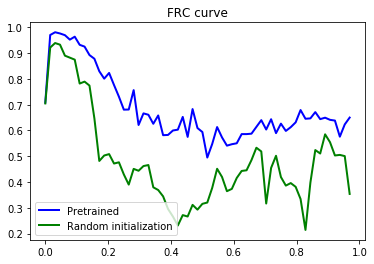

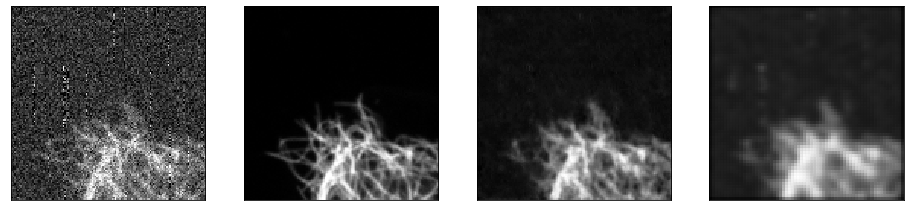

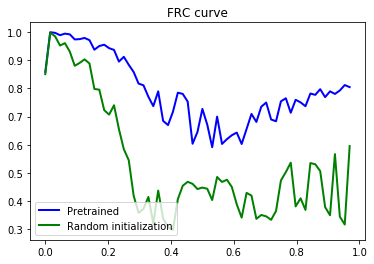

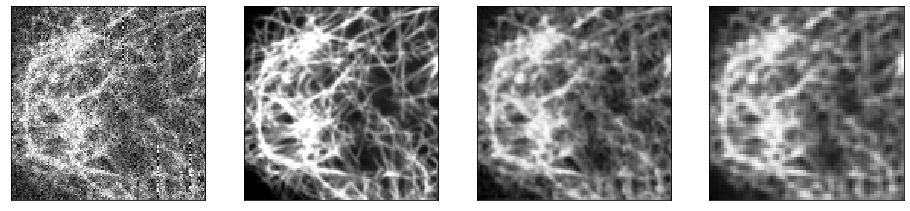

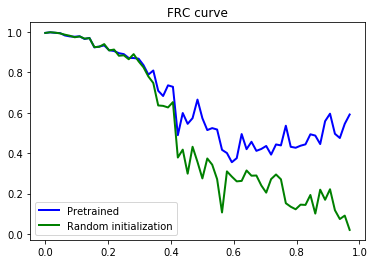

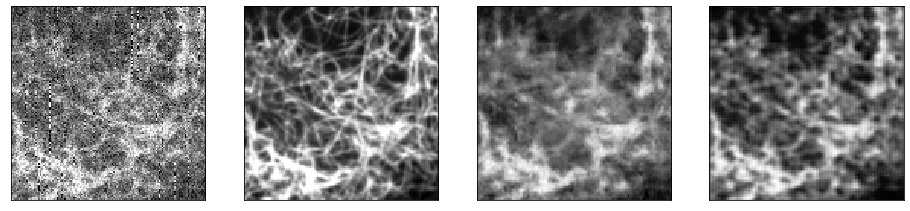

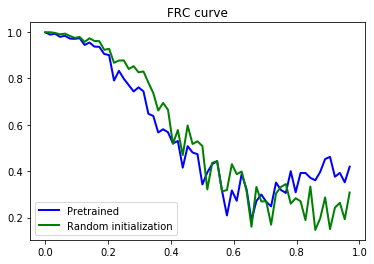

In [11]:
for sample_size in config['sample_size_list']:
    key_s = sample_size
    FMD[key_s] = {}
    random[key_s] = {}
    print(f"Running training with {sample_size} sample_size...")
    n_epoch = config['n_iters']
    
    for repeat in range(config['repeats']):
        print(f"No. {repeat}...")
        loader, dataset = load_confocal(config['root'], config['train_stat'], config['batch_size'], 
                                        config['psignal_levels'], sample_size, split_ratio = 0.2, 
                                        types=config['types'], captures=config['captures'],
                                        patch_size=config['patch_size'], loader=tiff_loader)
        noisy = dataset[0]
        clean = dataset[1]
        noisy, clean = noisy.type(torch.FloatTensor).to(device), clean.type(torch.FloatTensor).to(device)

        model_random = Unet()
        model_FMD = Unet()

        model_FMD.load_state_dict(torch.load('./models/FMD_epoch50_model'))

        optimizer_random = Adam(model_random.parameters(), lr=0.001)
        optimizer_FMD = Adam(model_FMD.parameters(), lr=0.0001)

        model_random = model_random.to(device)
        model_FMD = model_FMD.to(device)

        #print("Training: model initialized with FMD dataset training")
        model_FMD = train(model_FMD, loader, config['loss'], optimizer_FMD, n_epoch, \
                          masker, earlystop=True, patience=10, device=device, verbose=True)
        #print("Training: model randomly initialized")
        model_random = train(model_random, loader, config['loss'], optimizer_random, n_epoch, \
                             masker, earlystop=True, patience=10, device=device, verbose=True)

        output_FMD = model_FMD(noisy)
        output_random = model_random(noisy)
        
        # plot example images
        if repeat == 0:
            plot_tensors([noisy[0,0,:], clean[0,0,:], output_FMD[0,0,:], output_random[0,0,:]])

        output_FMD = output_FMD.cpu().detach().numpy()
        output_random = output_random.cpu().detach().numpy()
        noisy = noisy.cpu().detach().numpy()
        clean = clean.cpu().detach().numpy()
        
        if repeat == 0 and True:
            frc_FMD, spatial_freq = frc(output_FMD[0,0,:], clean[0,0,:])
            frc_random, spatial_freq = frc(output_random[0,0,:], clean[0,0,:])
            plt.figure()
            plt.plot( spatial_freq , frc_FMD , '-' , linewidth=2 , color='blue' , label='Pretrained' )
            plt.plot( spatial_freq , frc_random , '-' , linewidth=2 , color='green' , label='Random initialization' )
            plt.legend(loc='lower left')
            plt.title('FRC curve')

        for sample in range(sample_size):
            output_random[sample,:] = match_intensity(clean[sample,:], output_random[sample,:])
            output_FMD[sample,:] = match_intensity(clean[sample,:], output_FMD[sample,:])

        quantify(FMD[key_s], config['metrics_key'], clean[0,0, :], output_FMD[0,0,:])
        quantify(random[key_s], config['metrics_key'], clean[0,0, :], output_random[0,0,:])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


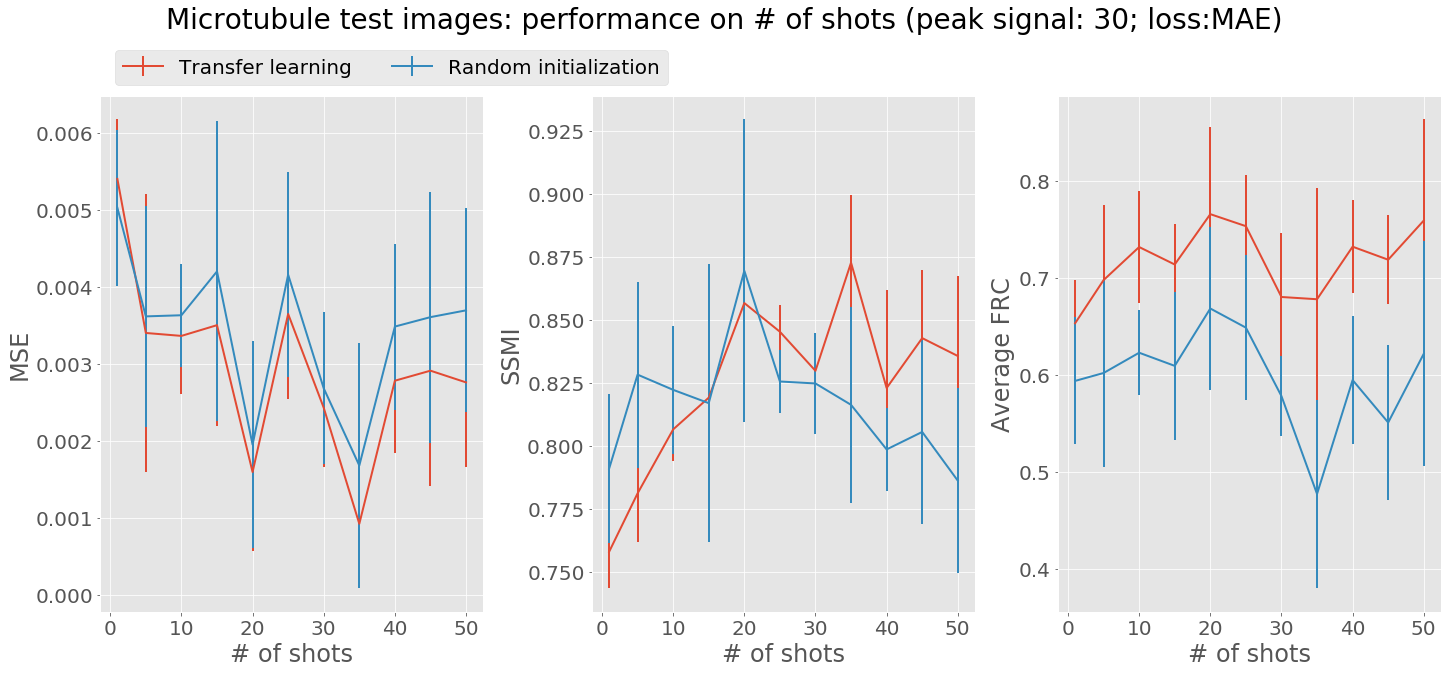

In [14]:
plot_quantifications([FMD,random], ['Transfer learning', 'Random initialization'], config['metrics_key'], 
                     ylabel=['MSE', 'SSMI', 'Average FRC'], xlabel='# of shots', 
                     title='Microtubule test images: performance on # of shots (peak signal: 30; loss:MAE)')

In [15]:
import os.path
import datetime

# make sure not rewrite previous results
name, extension = os.path.splitext(SIGNAL_FILE)
filename0 = name + str(datetime.datetime.now()) + extension

with open(filename0, 'w') as fd:
    fd.write(json.dumps([FMD, random, config]))

In [16]:
config = {
    'sample_size_list' : [10],
    'root' : DATA_FOLDER,
    'psignal_levels' : [i for i in range(10,101,10)], #[s for s in range(10,100,10)],
    'types' : ['microtubule'], # ['DNA', 'lysosome', 'microtubule', 'mitochondria'],
    'captures' : 1,
    'train_stat' : True,
    'patch_size' : 128,
    'batch_size' : 32,
    'n_iters' : 300,
    'repeats' : 10,
    'metrics_key' : ['mse', 'ssmi', 'frc'],
    'loss':'mae'
}

Running training with 10 peak signal level...
No. 0...
[9] loss: 0.08154 val_loss: 0.08188
[19] loss: 0.07952 val_loss: 0.08057
[29] loss: 0.07952 val_loss: 0.08033
[39] loss: 0.07858 val_loss: 0.07933
[49] loss: 0.07732 val_loss: 0.07918
[59] loss: 0.07782 val_loss: 0.07924
[69] loss: 0.07759 val_loss: 0.07841
[79] loss: 0.07665 val_loss: 0.07871
[89] loss: 0.07723 val_loss: 0.07864
[99] loss: 0.07707 val_loss: 0.07801
[109] loss: 0.07626 val_loss: 0.07840
[119] loss: 0.07690 val_loss: 0.07833
[129] loss: 0.07672 val_loss: 0.07778
[139] loss: 0.07599 val_loss: 0.07814
[149] loss: 0.07647 val_loss: 0.07798
[159] loss: 0.07633 val_loss: 0.07752
[169] loss: 0.07574 val_loss: 0.07795
[179] loss: 0.07627 val_loss: 0.07766
[189] loss: 0.07621 val_loss: 0.07724
[199] loss: 0.07551 val_loss: 0.07770
[209] loss: 0.07573 val_loss: 0.07724
[219] loss: 0.07563 val_loss: 0.07678
[229] loss: 0.07500 val_loss: 0.07737
[239] loss: 0.07528 val_loss: 0.07693
[249] loss: 0.07533 val_loss: 0.07658
[259] 

[129] loss: 0.09166 val_loss: 0.09203
[139] loss: 0.09101 val_loss: 0.09148
[149] loss: 0.09306 val_loss: 0.09225
[159] loss: 0.09141 val_loss: 0.09177
[169] loss: 0.09091 val_loss: 0.09123
[179] loss: 0.09649 val_loss: 0.09217
[189] loss: 0.09121 val_loss: 0.09116
[199] loss: 0.09584 val_loss: 0.09518
[209] loss: 0.10384 val_loss: 0.10226
[219] loss: 0.09676 val_loss: 0.10488
[229] loss: 0.11237 val_loss: 0.12838
[239] loss: 0.09766 val_loss: 0.09597
[249] loss: 0.09229 val_loss: 0.09119
[259] loss: 0.09088 val_loss: 0.09199
[269] loss: 0.09261 val_loss: 0.09278
[279] loss: 0.09113 val_loss: 0.09084
[289] loss: 0.09043 val_loss: 0.09095
[299] loss: 0.09226 val_loss: 0.09168
No. 4...
[9] loss: 0.09719 val_loss: 0.09642
[19] loss: 0.09354 val_loss: 0.09214
[29] loss: 0.09216 val_loss: 0.09165
[39] loss: 0.09101 val_loss: 0.09117
[49] loss: 0.09079 val_loss: 0.09033
[59] loss: 0.09110 val_loss: 0.09042
[69] loss: 0.09027 val_loss: 0.09044
[79] loss: 0.09002 val_loss: 0.08977
[89] loss: 0

[219] loss: 0.08278 val_loss: 0.08295
[229] loss: 0.08234 val_loss: 0.08282
[239] loss: 0.08155 val_loss: 0.08208
[249] loss: 0.08256 val_loss: 0.08284
[259] loss: 0.08232 val_loss: 0.08256
[269] loss: 0.08125 val_loss: 0.08156
[279] loss: 0.08196 val_loss: 0.08225
[289] loss: 0.08159 val_loss: 0.08195
[299] loss: 0.08072 val_loss: 0.08135
[9] loss: 0.15780 val_loss: 0.15111
[19] loss: 0.10396 val_loss: 0.10167
[29] loss: 0.09076 val_loss: 0.09367
[39] loss: 0.08933 val_loss: 0.08917
[49] loss: 0.08872 val_loss: 0.08748
[59] loss: 0.08705 val_loss: 0.08876
[69] loss: 0.08640 val_loss: 0.08627
[79] loss: 0.08604 val_loss: 0.08602
[89] loss: 0.08536 val_loss: 0.08643
[99] loss: 0.08576 val_loss: 0.08529
[109] loss: 0.08533 val_loss: 0.08537
[119] loss: 0.08479 val_loss: 0.08678
[129] loss: 0.08514 val_loss: 0.08519
[139] loss: 0.08481 val_loss: 0.08500
[149] loss: 0.08552 val_loss: 0.08542
[159] loss: 0.08511 val_loss: 0.08489
[169] loss: 0.08476 val_loss: 0.08505
[179] loss: 0.08508 val

[279] loss: 0.06435 val_loss: 0.06459
[289] loss: 0.06282 val_loss: 0.06571
[299] loss: 0.06527 val_loss: 0.06351
No. 1...
[9] loss: 0.06896 val_loss: 0.06885
[19] loss: 0.06587 val_loss: 0.06591
[29] loss: 0.06363 val_loss: 0.06472
[39] loss: 0.06275 val_loss: 0.06391
[49] loss: 0.06389 val_loss: 0.06369
[59] loss: 0.06265 val_loss: 0.06362
[69] loss: 0.06198 val_loss: 0.06311
[79] loss: 0.06329 val_loss: 0.06306
[89] loss: 0.06216 val_loss: 0.06307
[99] loss: 0.06155 val_loss: 0.06270
[109] loss: 0.06287 val_loss: 0.06267
[119] loss: 0.06178 val_loss: 0.06271
[129] loss: 0.06122 val_loss: 0.06242
[139] loss: 0.06257 val_loss: 0.06234
[149] loss: 0.06147 val_loss: 0.06238
[159] loss: 0.06094 val_loss: 0.06216
[169] loss: 0.06238 val_loss: 0.06211
[179] loss: 0.06132 val_loss: 0.06215
[189] loss: 0.06076 val_loss: 0.06199
[199] loss: 0.06214 val_loss: 0.06186
[209] loss: 0.06105 val_loss: 0.06191
[219] loss: 0.06059 val_loss: 0.06181
[229] loss: 0.06195 val_loss: 0.06160
[239] loss: 0.

[49] loss: 0.07259 val_loss: 0.07225
[59] loss: 0.07124 val_loss: 0.06920
[69] loss: 0.07004 val_loss: 0.06857
[79] loss: 0.07080 val_loss: 0.07009
[89] loss: 0.06986 val_loss: 0.06785
[99] loss: 0.06820 val_loss: 0.06667
[109] loss: 0.06860 val_loss: 0.06875
[119] loss: 0.06909 val_loss: 0.06767
[129] loss: 0.06769 val_loss: 0.06602
[139] loss: 0.06790 val_loss: 0.07233
[149] loss: 0.06922 val_loss: 0.06608
[159] loss: 0.06763 val_loss: 0.06533
[169] loss: 0.07005 val_loss: 0.06861
[179] loss: 0.06921 val_loss: 0.06635
[189] loss: 0.06588 val_loss: 0.06932
[199] loss: 0.07609 val_loss: 0.06907
[209] loss: 0.06769 val_loss: 0.06818
[219] loss: 0.06649 val_loss: 0.06584
[229] loss: 0.06581 val_loss: 0.06619
[239] loss: 0.06640 val_loss: 0.06507
[249] loss: 0.06521 val_loss: 0.06453
[259] loss: 0.06597 val_loss: 0.06580
[269] loss: 0.06590 val_loss: 0.06655
[279] loss: 0.06660 val_loss: 0.06474
[289] loss: 0.06859 val_loss: 0.06654
[299] loss: 0.06615 val_loss: 0.06544
No. 5...
[9] loss:

[119] loss: 0.06725 val_loss: 0.06696
[129] loss: 0.06600 val_loss: 0.06522
[139] loss: 0.06632 val_loss: 0.06558
[149] loss: 0.06695 val_loss: 0.06662
[159] loss: 0.06575 val_loss: 0.06493
[169] loss: 0.06605 val_loss: 0.06531
[179] loss: 0.06668 val_loss: 0.06631
[189] loss: 0.06551 val_loss: 0.06467
[199] loss: 0.06580 val_loss: 0.06506
[209] loss: 0.06641 val_loss: 0.06604
[219] loss: 0.06533 val_loss: 0.06447
[229] loss: 0.06560 val_loss: 0.06489
[239] loss: 0.06619 val_loss: 0.06580
[249] loss: 0.06511 val_loss: 0.06424
[259] loss: 0.06539 val_loss: 0.06457
[269] loss: 0.06591 val_loss: 0.06548
[279] loss: 0.06479 val_loss: 0.06392
[289] loss: 0.06519 val_loss: 0.06435
[299] loss: 0.06576 val_loss: 0.06528
[9] loss: 0.19740 val_loss: 0.16601
[19] loss: 0.09655 val_loss: 0.09407
[29] loss: 0.08757 val_loss: 0.08856
[39] loss: 0.08387 val_loss: 0.08685
[49] loss: 0.09432 val_loss: 0.09427
[59] loss: 0.08874 val_loss: 0.08240
[69] loss: 0.07888 val_loss: 0.07706
[79] loss: 0.07644 v

[189] loss: 0.06251 val_loss: 0.06285
[199] loss: 0.06357 val_loss: 0.06343
[209] loss: 0.06353 val_loss: 0.06240
[219] loss: 0.06220 val_loss: 0.06298
[229] loss: 0.06591 val_loss: 0.06309
[239] loss: 0.06312 val_loss: 0.06328
[249] loss: 0.06290 val_loss: 0.06287
[259] loss: 0.06662 val_loss: 0.06358
[269] loss: 0.06334 val_loss: 0.06299
[279] loss: 0.06224 val_loss: 0.06302
[289] loss: 0.06522 val_loss: 0.06360
[299] loss: 0.06346 val_loss: 0.06177
No. 2...
[9] loss: 0.05825 val_loss: 0.05754
[19] loss: 0.05424 val_loss: 0.05475
[29] loss: 0.05262 val_loss: 0.05422
[39] loss: 0.05260 val_loss: 0.05242
[49] loss: 0.05170 val_loss: 0.05233
[59] loss: 0.05130 val_loss: 0.05247
[69] loss: 0.05172 val_loss: 0.05145
[79] loss: 0.05086 val_loss: 0.05160
[89] loss: 0.05066 val_loss: 0.05166
[99] loss: 0.05124 val_loss: 0.05094
[109] loss: 0.05040 val_loss: 0.05118
[119] loss: 0.05024 val_loss: 0.05119
[129] loss: 0.05096 val_loss: 0.05063
[139] loss: 0.05004 val_loss: 0.05088
[149] loss: 0.

[299] loss: 0.05368 val_loss: 0.05460
[9] loss: 0.15621 val_loss: 0.15379
[19] loss: 0.09599 val_loss: 0.08516
[29] loss: 0.07748 val_loss: 0.07664
[39] loss: 0.07010 val_loss: 0.06888
[49] loss: 0.07328 val_loss: 0.06868
[59] loss: 0.06703 val_loss: 0.06461
[69] loss: 0.06252 val_loss: 0.06151
[79] loss: 0.06261 val_loss: 0.06251
[89] loss: 0.05992 val_loss: 0.06213
[99] loss: 0.05943 val_loss: 0.05885
[109] loss: 0.06114 val_loss: 0.05889
[119] loss: 0.05919 val_loss: 0.06669
[129] loss: 0.06586 val_loss: 0.05879
[139] loss: 0.06055 val_loss: 0.05817
[149] loss: 0.05813 val_loss: 0.06079
[159] loss: 0.05749 val_loss: 0.05719
[169] loss: 0.05898 val_loss: 0.05772
[179] loss: 0.05770 val_loss: 0.05845
[189] loss: 0.05596 val_loss: 0.05595
[199] loss: 0.06169 val_loss: 0.06065
[209] loss: 0.05795 val_loss: 0.05923
[219] loss: 0.05825 val_loss: 0.05575
[229] loss: 0.05708 val_loss: 0.05801
[239] loss: 0.05672 val_loss: 0.06183
[249] loss: 0.05723 val_loss: 0.05715
[259] loss: 0.05917 val

[149] loss: 0.05374 val_loss: 0.05437
[159] loss: 0.05366 val_loss: 0.05316
[169] loss: 0.05319 val_loss: 0.05479
[179] loss: 0.05347 val_loss: 0.05412
[189] loss: 0.05347 val_loss: 0.05298
[199] loss: 0.05300 val_loss: 0.05460
[209] loss: 0.05327 val_loss: 0.05391
[219] loss: 0.05329 val_loss: 0.05280
[229] loss: 0.05282 val_loss: 0.05442
[239] loss: 0.05309 val_loss: 0.05371
[249] loss: 0.05312 val_loss: 0.05264
[259] loss: 0.05265 val_loss: 0.05426
[269] loss: 0.05294 val_loss: 0.05354
[279] loss: 0.05297 val_loss: 0.05250
[289] loss: 0.05253 val_loss: 0.05410
[299] loss: 0.05277 val_loss: 0.05337
[9] loss: 0.10241 val_loss: 0.11768
[19] loss: 0.07579 val_loss: 0.07242
[29] loss: 0.06808 val_loss: 0.06941
[39] loss: 0.06498 val_loss: 0.06257
[49] loss: 0.06263 val_loss: 0.06135
[59] loss: 0.05940 val_loss: 0.06157
[69] loss: 0.05826 val_loss: 0.05662
[79] loss: 0.06000 val_loss: 0.05874
[89] loss: 0.05716 val_loss: 0.06007
[99] loss: 0.05644 val_loss: 0.05593
[109] loss: 0.05866 val

[49] loss: 0.04190 val_loss: 0.04215
[59] loss: 0.04158 val_loss: 0.04119
[69] loss: 0.04112 val_loss: 0.04064
[79] loss: 0.04101 val_loss: 0.04146
[89] loss: 0.04099 val_loss: 0.04047
[99] loss: 0.04069 val_loss: 0.04028
[109] loss: 0.04051 val_loss: 0.04108
[119] loss: 0.04064 val_loss: 0.04001
[129] loss: 0.04040 val_loss: 0.04003
[139] loss: 0.04020 val_loss: 0.04080
[149] loss: 0.04040 val_loss: 0.03968
[159] loss: 0.04018 val_loss: 0.03986
[169] loss: 0.03996 val_loss: 0.04060
[179] loss: 0.04020 val_loss: 0.03944
[189] loss: 0.04000 val_loss: 0.03969
[199] loss: 0.03975 val_loss: 0.04042
[209] loss: 0.04002 val_loss: 0.03923
[219] loss: 0.03984 val_loss: 0.03953
[229] loss: 0.03958 val_loss: 0.04027
[239] loss: 0.03985 val_loss: 0.03905
[249] loss: 0.03973 val_loss: 0.03939
[259] loss: 0.03944 val_loss: 0.04013
[269] loss: 0.03972 val_loss: 0.03887
[279] loss: 0.03967 val_loss: 0.03926
[289] loss: 0.03931 val_loss: 0.04003
[299] loss: 0.03962 val_loss: 0.03873
[9] loss: 0.10808 

[129] loss: 0.04254 val_loss: 0.04239
[139] loss: 0.04239 val_loss: 0.04205
[149] loss: 0.04204 val_loss: 0.04388
[159] loss: 0.04254 val_loss: 0.04247
[169] loss: 0.04219 val_loss: 0.04194
[179] loss: 0.04207 val_loss: 0.04338
[189] loss: 0.04191 val_loss: 0.04207
[199] loss: 0.04227 val_loss: 0.04191
[209] loss: 0.04179 val_loss: 0.04308
[219] loss: 0.04274 val_loss: 0.04233
[229] loss: 0.04195 val_loss: 0.04176
[239] loss: 0.04158 val_loss: 0.04344
[249] loss: 0.04273 val_loss: 0.04455
[259] loss: 0.04409 val_loss: 0.04446
[269] loss: 0.04737 val_loss: 0.06181
[279] loss: 0.05122 val_loss: 0.04689
[289] loss: 0.04330 val_loss: 0.04213
[299] loss: 0.04224 val_loss: 0.04343
No. 7...
[9] loss: 0.05025 val_loss: 0.04861
[19] loss: 0.04439 val_loss: 0.04388
[29] loss: 0.04293 val_loss: 0.04242
[39] loss: 0.04119 val_loss: 0.04108
[49] loss: 0.04119 val_loss: 0.04085
[59] loss: 0.04162 val_loss: 0.04085
[69] loss: 0.04007 val_loss: 0.04020
[79] loss: 0.04029 val_loss: 0.04010
[89] loss: 0

[189] loss: 0.03952 val_loss: 0.03971
[199] loss: 0.03941 val_loss: 0.03984
[209] loss: 0.03963 val_loss: 0.03963
[219] loss: 0.03937 val_loss: 0.03954
[229] loss: 0.03924 val_loss: 0.03967
[239] loss: 0.03948 val_loss: 0.03946
[249] loss: 0.03923 val_loss: 0.03940
[259] loss: 0.03909 val_loss: 0.03952
[269] loss: 0.03934 val_loss: 0.03932
[279] loss: 0.03909 val_loss: 0.03927
[289] loss: 0.03895 val_loss: 0.03938
[299] loss: 0.03920 val_loss: 0.03919
[9] loss: 0.08335 val_loss: 0.11283
[19] loss: 0.05844 val_loss: 0.05859
[29] loss: 0.05320 val_loss: 0.05287
[39] loss: 0.04872 val_loss: 0.04865
[49] loss: 0.04679 val_loss: 0.04687
[59] loss: 0.04667 val_loss: 0.04730
[69] loss: 0.04489 val_loss: 0.04424
[79] loss: 0.04432 val_loss: 0.04684
[89] loss: 0.04529 val_loss: 0.04563
[99] loss: 0.04393 val_loss: 0.04876
[109] loss: 0.04698 val_loss: 0.04735
[119] loss: 0.04496 val_loss: 0.04765
[129] loss: 0.04427 val_loss: 0.04763
[139] loss: 0.04606 val_loss: 0.04422
[149] loss: 0.05305 val

[259] loss: 0.04232 val_loss: 0.04255
[269] loss: 0.04913 val_loss: 0.04277
[279] loss: 0.04219 val_loss: 0.04199
[289] loss: 0.04193 val_loss: 0.04274
[299] loss: 0.04883 val_loss: 0.04297
No. 4...
[9] loss: 0.04781 val_loss: 0.04571
[19] loss: 0.04285 val_loss: 0.04200
[29] loss: 0.04150 val_loss: 0.04089
[39] loss: 0.04000 val_loss: 0.03971
[49] loss: 0.03993 val_loss: 0.03949
[59] loss: 0.03973 val_loss: 0.03871
[69] loss: 0.03850 val_loss: 0.03852
[79] loss: 0.03895 val_loss: 0.03871
[89] loss: 0.03892 val_loss: 0.03782
[99] loss: 0.03783 val_loss: 0.03800
[109] loss: 0.03847 val_loss: 0.03833
[119] loss: 0.03849 val_loss: 0.03735
[129] loss: 0.03749 val_loss: 0.03771
[139] loss: 0.03816 val_loss: 0.03807
[149] loss: 0.03817 val_loss: 0.03703
[159] loss: 0.03727 val_loss: 0.03749
[169] loss: 0.03793 val_loss: 0.03787
[179] loss: 0.03794 val_loss: 0.03679
[189] loss: 0.03710 val_loss: 0.03731
[199] loss: 0.03772 val_loss: 0.03771
[209] loss: 0.03774 val_loss: 0.03659
[219] loss: 0.

[29] loss: 0.05796 val_loss: 0.05537
[39] loss: 0.04945 val_loss: 0.04841
[49] loss: 0.04999 val_loss: 0.04784
[59] loss: 0.04928 val_loss: 0.04898
[69] loss: 0.04650 val_loss: 0.04640
[79] loss: 0.04718 val_loss: 0.04677
[89] loss: 0.05059 val_loss: 0.05984
[99] loss: 0.05833 val_loss: 0.04652
[109] loss: 0.05680 val_loss: 0.04866
[119] loss: 0.05224 val_loss: 0.04913
[129] loss: 0.04815 val_loss: 0.04581
[139] loss: 0.04723 val_loss: 0.04599
[149] loss: 0.04736 val_loss: 0.04618
[159] loss: 0.04570 val_loss: 0.04515
[169] loss: 0.04607 val_loss: 0.04615
[179] loss: 0.04689 val_loss: 0.04569
[189] loss: 0.04490 val_loss: 0.04483
[199] loss: 0.04577 val_loss: 0.04564
[209] loss: 0.04604 val_loss: 0.04561
[219] loss: 0.04471 val_loss: 0.04483
[229] loss: 0.04684 val_loss: 0.04611
[239] loss: 0.04560 val_loss: 0.04537
[249] loss: 0.04469 val_loss: 0.04473
[259] loss: 0.04606 val_loss: 0.04646
[269] loss: 0.04598 val_loss: 0.04500
[279] loss: 0.04450 val_loss: 0.04474
[289] loss: 0.04624 

[89] loss: 0.03308 val_loss: 0.03369
[99] loss: 0.03260 val_loss: 0.03327
[109] loss: 0.03316 val_loss: 0.03354
[119] loss: 0.03272 val_loss: 0.03329
[129] loss: 0.03240 val_loss: 0.03295
[139] loss: 0.03288 val_loss: 0.03332
[149] loss: 0.03247 val_loss: 0.03302
[159] loss: 0.03226 val_loss: 0.03272
[169] loss: 0.03268 val_loss: 0.03315
[179] loss: 0.03227 val_loss: 0.03280
[189] loss: 0.03213 val_loss: 0.03254
[199] loss: 0.03252 val_loss: 0.03300
[209] loss: 0.03211 val_loss: 0.03263
[219] loss: 0.03201 val_loss: 0.03238
[229] loss: 0.03238 val_loss: 0.03287
[239] loss: 0.03197 val_loss: 0.03248
[249] loss: 0.03192 val_loss: 0.03228
[259] loss: 0.03229 val_loss: 0.03277
[269] loss: 0.03181 val_loss: 0.03236
[279] loss: 0.03183 val_loss: 0.03216
[289] loss: 0.03219 val_loss: 0.03268
[299] loss: 0.03169 val_loss: 0.03225
[9] loss: 0.05922 val_loss: 0.07278
[19] loss: 0.05334 val_loss: 0.05346
[29] loss: 0.04652 val_loss: 0.04661
[39] loss: 0.03960 val_loss: 0.04205
[49] loss: 0.04119 

[169] loss: 0.03094 val_loss: 0.03007
[179] loss: 0.02998 val_loss: 0.03101
[189] loss: 0.02967 val_loss: 0.03053
[199] loss: 0.03007 val_loss: 0.02993
[209] loss: 0.02964 val_loss: 0.03065
[219] loss: 0.02952 val_loss: 0.03042
[229] loss: 0.02995 val_loss: 0.02991
[239] loss: 0.02955 val_loss: 0.03048
[249] loss: 0.02940 val_loss: 0.03035
[259] loss: 0.02993 val_loss: 0.02991
[269] loss: 0.02955 val_loss: 0.03035
[279] loss: 0.02945 val_loss: 0.03037
[289] loss: 0.02990 val_loss: 0.02972
[299] loss: 0.02936 val_loss: 0.03006
No. 5...
[9] loss: 0.04183 val_loss: 0.04136
[19] loss: 0.03762 val_loss: 0.03734
[29] loss: 0.03649 val_loss: 0.03649
[39] loss: 0.03541 val_loss: 0.03559
[49] loss: 0.03504 val_loss: 0.03502
[59] loss: 0.03509 val_loss: 0.03502
[69] loss: 0.03461 val_loss: 0.03463
[79] loss: 0.03432 val_loss: 0.03433
[89] loss: 0.03449 val_loss: 0.03443
[99] loss: 0.03427 val_loss: 0.03420
[109] loss: 0.03392 val_loss: 0.03396
[119] loss: 0.03413 val_loss: 0.03411
[129] loss: 0.

[239] loss: 0.03086 val_loss: 0.03046
[249] loss: 0.03049 val_loss: 0.03008
[259] loss: 0.02977 val_loss: 0.03051
[269] loss: 0.03071 val_loss: 0.03035
[279] loss: 0.03040 val_loss: 0.03000
[289] loss: 0.02973 val_loss: 0.03046
[299] loss: 0.03062 val_loss: 0.03029
[9] loss: 0.13376 val_loss: 0.13349
[19] loss: 0.06811 val_loss: 0.06724
[29] loss: 0.05645 val_loss: 0.05038
[39] loss: 0.04654 val_loss: 0.04553
[49] loss: 0.04504 val_loss: 0.04359
[59] loss: 0.04323 val_loss: 0.04134
[69] loss: 0.04129 val_loss: 0.03979
[79] loss: 0.04079 val_loss: 0.04158
[89] loss: 0.04017 val_loss: 0.03979
[99] loss: 0.04129 val_loss: 0.04082
[109] loss: 0.04057 val_loss: 0.03920
[119] loss: 0.04558 val_loss: 0.04613
[129] loss: 0.04881 val_loss: 0.03982
[139] loss: 0.03971 val_loss: 0.04188
[149] loss: 0.04004 val_loss: 0.03772
[159] loss: 0.04266 val_loss: 0.03726
[169] loss: 0.03775 val_loss: 0.03859
[179] loss: 0.03822 val_loss: 0.03730
[189] loss: 0.03735 val_loss: 0.03624
[199] loss: 0.03698 val

[9] loss: 0.03704 val_loss: 0.03542
[19] loss: 0.03110 val_loss: 0.03090
[29] loss: 0.03020 val_loss: 0.03060
[39] loss: 0.02963 val_loss: 0.02893
[49] loss: 0.02870 val_loss: 0.02889
[59] loss: 0.02866 val_loss: 0.02894
[69] loss: 0.02861 val_loss: 0.02799
[79] loss: 0.02798 val_loss: 0.02839
[89] loss: 0.02799 val_loss: 0.02822
[99] loss: 0.02822 val_loss: 0.02759
[109] loss: 0.02766 val_loss: 0.02810
[119] loss: 0.02764 val_loss: 0.02783
[129] loss: 0.02797 val_loss: 0.02733
[139] loss: 0.02744 val_loss: 0.02791
[149] loss: 0.02742 val_loss: 0.02757
[159] loss: 0.02780 val_loss: 0.02715
[169] loss: 0.02728 val_loss: 0.02778
[179] loss: 0.02724 val_loss: 0.02739
[189] loss: 0.02766 val_loss: 0.02701
[199] loss: 0.02715 val_loss: 0.02767
[209] loss: 0.02709 val_loss: 0.02725
[219] loss: 0.02755 val_loss: 0.02689
[229] loss: 0.02703 val_loss: 0.02758
[239] loss: 0.02697 val_loss: 0.02714
[249] loss: 0.02747 val_loss: 0.02680
[259] loss: 0.02693 val_loss: 0.02750
[269] loss: 0.02687 val

[229] loss: 0.03203 val_loss: 0.03232
[239] loss: 0.03916 val_loss: 0.03107
[249] loss: 0.03519 val_loss: 0.03112
[259] loss: 0.03280 val_loss: 0.03475
early stopping at 270 iterations!
No. 6...
[9] loss: 0.04625 val_loss: 0.04492
[19] loss: 0.04037 val_loss: 0.04005
[29] loss: 0.03893 val_loss: 0.04035
[39] loss: 0.03759 val_loss: 0.03723
[49] loss: 0.03706 val_loss: 0.03712
[59] loss: 0.03698 val_loss: 0.03811
[69] loss: 0.03627 val_loss: 0.03590
[79] loss: 0.03608 val_loss: 0.03633
[89] loss: 0.03616 val_loss: 0.03718
[99] loss: 0.03573 val_loss: 0.03528
[109] loss: 0.03562 val_loss: 0.03590
[119] loss: 0.03573 val_loss: 0.03666
[129] loss: 0.03544 val_loss: 0.03490
[139] loss: 0.03533 val_loss: 0.03560
[149] loss: 0.03541 val_loss: 0.03631
[159] loss: 0.03523 val_loss: 0.03466
[169] loss: 0.03514 val_loss: 0.03539
[179] loss: 0.03520 val_loss: 0.03604
[189] loss: 0.03507 val_loss: 0.03448
[199] loss: 0.03498 val_loss: 0.03522
[209] loss: 0.03503 val_loss: 0.03581
[219] loss: 0.0349

[79] loss: 0.03516 val_loss: 0.03497
[89] loss: 0.03629 val_loss: 0.03701
[99] loss: 0.03419 val_loss: 0.03444
[109] loss: 0.03474 val_loss: 0.03450
[119] loss: 0.03520 val_loss: 0.03562
[129] loss: 0.03368 val_loss: 0.03526
[139] loss: 0.03419 val_loss: 0.03447
[149] loss: 0.03506 val_loss: 0.03482
[159] loss: 0.03369 val_loss: 0.03395
[169] loss: 0.03409 val_loss: 0.03405
[179] loss: 0.03463 val_loss: 0.03434
[189] loss: 0.03352 val_loss: 0.03406
[199] loss: 0.03390 val_loss: 0.03368
[209] loss: 0.03445 val_loss: 0.03402
[219] loss: 0.03345 val_loss: 0.03381
[229] loss: 0.03364 val_loss: 0.03378
[239] loss: 0.03435 val_loss: 0.03436
[249] loss: 0.03616 val_loss: 0.03405
[259] loss: 0.03492 val_loss: 0.03426
[269] loss: 0.03546 val_loss: 0.03397
[279] loss: 0.03406 val_loss: 0.03473
[289] loss: 0.03396 val_loss: 0.03558
early stopping at 300 iterations!
Running training with 80 peak signal level...
No. 0...
[9] loss: 0.03621 val_loss: 0.03576
[19] loss: 0.03278 val_loss: 0.03217
[29] 

[209] loss: 0.02495 val_loss: 0.02506
[219] loss: 0.02493 val_loss: 0.02468
[229] loss: 0.02500 val_loss: 0.02485
[239] loss: 0.02481 val_loss: 0.02498
[249] loss: 0.02485 val_loss: 0.02461
[259] loss: 0.02490 val_loss: 0.02473
[269] loss: 0.02471 val_loss: 0.02489
[279] loss: 0.02478 val_loss: 0.02455
[289] loss: 0.02478 val_loss: 0.02463
[299] loss: 0.02460 val_loss: 0.02480
[9] loss: 0.04647 val_loss: 0.04221
[19] loss: 0.03740 val_loss: 0.03391
[29] loss: 0.03219 val_loss: 0.03218
[39] loss: 0.02993 val_loss: 0.02856
[49] loss: 0.02972 val_loss: 0.02813
[59] loss: 0.03035 val_loss: 0.02866
[69] loss: 0.02723 val_loss: 0.02668
[79] loss: 0.02731 val_loss: 0.02695
[89] loss: 0.02882 val_loss: 0.02733
[99] loss: 0.02638 val_loss: 0.02626
[109] loss: 0.02667 val_loss: 0.02623
[119] loss: 0.02835 val_loss: 0.02694
[129] loss: 0.02612 val_loss: 0.02590
[139] loss: 0.02633 val_loss: 0.02605
[149] loss: 0.02799 val_loss: 0.02646
[159] loss: 0.02616 val_loss: 0.02599
[169] loss: 0.02624 val

[279] loss: 0.02985 val_loss: 0.02988
[289] loss: 0.02951 val_loss: 0.03037
[299] loss: 0.03033 val_loss: 0.02970
No. 7...
[9] loss: 0.04110 val_loss: 0.04029
[19] loss: 0.03766 val_loss: 0.03610
[29] loss: 0.03437 val_loss: 0.03568
[39] loss: 0.03385 val_loss: 0.03351
[49] loss: 0.03384 val_loss: 0.03322
[59] loss: 0.03277 val_loss: 0.03377
[69] loss: 0.03265 val_loss: 0.03236
[79] loss: 0.03272 val_loss: 0.03239
[89] loss: 0.03206 val_loss: 0.03306
[99] loss: 0.03215 val_loss: 0.03186
[109] loss: 0.03220 val_loss: 0.03196
[119] loss: 0.03166 val_loss: 0.03265
[129] loss: 0.03186 val_loss: 0.03157
[139] loss: 0.03187 val_loss: 0.03168
[149] loss: 0.03141 val_loss: 0.03237
[159] loss: 0.03166 val_loss: 0.03136
[169] loss: 0.03162 val_loss: 0.03147
[179] loss: 0.03121 val_loss: 0.03214
[189] loss: 0.03151 val_loss: 0.03123
[199] loss: 0.03142 val_loss: 0.03130
[209] loss: 0.03106 val_loss: 0.03192
[219] loss: 0.03138 val_loss: 0.03110
[229] loss: 0.03126 val_loss: 0.03115
[239] loss: 0.

[39] loss: 0.04616 val_loss: 0.04680
[49] loss: 0.04278 val_loss: 0.04061
[59] loss: 0.04282 val_loss: 0.04868
[69] loss: 0.04878 val_loss: 0.04380
[79] loss: 0.03779 val_loss: 0.03767
[89] loss: 0.03749 val_loss: 0.03835
[99] loss: 0.03724 val_loss: 0.03459
[109] loss: 0.03836 val_loss: 0.03818
[119] loss: 0.03559 val_loss: 0.03380
[129] loss: 0.03297 val_loss: 0.03398
[139] loss: 0.04301 val_loss: 0.03504
[149] loss: 0.03452 val_loss: 0.03559
[159] loss: 0.03491 val_loss: 0.03421
[169] loss: 0.03819 val_loss: 0.03200
[179] loss: 0.03345 val_loss: 0.03539
[189] loss: 0.03661 val_loss: 0.03264
[199] loss: 0.03369 val_loss: 0.03037
[209] loss: 0.03311 val_loss: 0.03869
[219] loss: 0.03660 val_loss: 0.03174
[229] loss: 0.03251 val_loss: 0.03123
[239] loss: 0.03337 val_loss: 0.03597
[249] loss: 0.03622 val_loss: 0.03069
[259] loss: 0.03271 val_loss: 0.03234
[269] loss: 0.03164 val_loss: 0.03130
[279] loss: 0.03091 val_loss: 0.03064
[289] loss: 0.03589 val_loss: 0.03564
[299] loss: 0.03295

[109] loss: 0.02469 val_loss: 0.02444
[119] loss: 0.02483 val_loss: 0.02478
[129] loss: 0.02461 val_loss: 0.02443
[139] loss: 0.02443 val_loss: 0.02420
[149] loss: 0.02459 val_loss: 0.02455
[159] loss: 0.02445 val_loss: 0.02424
[169] loss: 0.02425 val_loss: 0.02405
[179] loss: 0.02440 val_loss: 0.02436
[189] loss: 0.02433 val_loss: 0.02409
[199] loss: 0.02409 val_loss: 0.02393
[209] loss: 0.02426 val_loss: 0.02421
[219] loss: 0.02424 val_loss: 0.02398
[229] loss: 0.02397 val_loss: 0.02382
[239] loss: 0.02415 val_loss: 0.02408
[249] loss: 0.02415 val_loss: 0.02389
[259] loss: 0.02386 val_loss: 0.02374
[269] loss: 0.02406 val_loss: 0.02399
[279] loss: 0.02408 val_loss: 0.02381
[289] loss: 0.02379 val_loss: 0.02366
[299] loss: 0.02397 val_loss: 0.02391
[9] loss: 0.05344 val_loss: 0.05416
[19] loss: 0.04065 val_loss: 0.03903
[29] loss: 0.03557 val_loss: 0.03404
[39] loss: 0.02915 val_loss: 0.02843
[49] loss: 0.02774 val_loss: 0.02645
[59] loss: 0.02764 val_loss: 0.02824
[69] loss: 0.02579 

[179] loss: 0.03194 val_loss: 0.03787
[189] loss: 0.03197 val_loss: 0.03117
[199] loss: 0.03297 val_loss: 0.03197
[209] loss: 0.03224 val_loss: 0.03815
[219] loss: 0.03173 val_loss: 0.03104
[229] loss: 0.03314 val_loss: 0.03261
[239] loss: 0.03254 val_loss: 0.04042
[249] loss: 0.03293 val_loss: 0.04116
[259] loss: 0.05754 val_loss: 0.04111
[269] loss: 0.03770 val_loss: 0.04359
[279] loss: 0.03327 val_loss: 0.03202
[289] loss: 0.03856 val_loss: 0.03716
[299] loss: 0.03387 val_loss: 0.03907
No. 8...
[9] loss: 0.03598 val_loss: 0.03520
[19] loss: 0.03107 val_loss: 0.03028
[29] loss: 0.02922 val_loss: 0.02948
[39] loss: 0.02818 val_loss: 0.02792
[49] loss: 0.02754 val_loss: 0.02720
[59] loss: 0.02704 val_loss: 0.02713
[69] loss: 0.02685 val_loss: 0.02663
[79] loss: 0.02653 val_loss: 0.02633
[89] loss: 0.02620 val_loss: 0.02619
[99] loss: 0.02633 val_loss: 0.02612
[109] loss: 0.02607 val_loss: 0.02595
[119] loss: 0.02580 val_loss: 0.02574
[129] loss: 0.02608 val_loss: 0.02585
[139] loss: 0.

[239] loss: 0.02694 val_loss: 0.02667
[249] loss: 0.02622 val_loss: 0.02680
[259] loss: 0.02680 val_loss: 0.02670
[269] loss: 0.02683 val_loss: 0.02654
[279] loss: 0.02613 val_loss: 0.02673
[289] loss: 0.02668 val_loss: 0.02660
[299] loss: 0.02672 val_loss: 0.02643
[9] loss: 0.16893 val_loss: 0.12150
[19] loss: 0.05348 val_loss: 0.05364
[29] loss: 0.04477 val_loss: 0.04528
[39] loss: 0.04085 val_loss: 0.03956
[49] loss: 0.03912 val_loss: 0.03876
[59] loss: 0.03754 val_loss: 0.03852
[69] loss: 0.03596 val_loss: 0.03570
[79] loss: 0.03616 val_loss: 0.03598
[89] loss: 0.03514 val_loss: 0.03658
[99] loss: 0.03374 val_loss: 0.03550
[109] loss: 0.03361 val_loss: 0.03411
[119] loss: 0.03875 val_loss: 0.03665
[129] loss: 0.03461 val_loss: 0.04023
[139] loss: 0.07531 val_loss: 0.07183
[149] loss: 0.04660 val_loss: 0.04384
[159] loss: 0.03758 val_loss: 0.03369
[169] loss: 0.03695 val_loss: 0.03876
[179] loss: 0.03544 val_loss: 0.03633
[189] loss: 0.03347 val_loss: 0.03332
[199] loss: 0.03273 val

[19] loss: 0.04240 val_loss: 0.04051
[29] loss: 0.03862 val_loss: 0.04012
[39] loss: 0.03663 val_loss: 0.03618
[49] loss: 0.03690 val_loss: 0.03599
[59] loss: 0.03495 val_loss: 0.03651
[69] loss: 0.03451 val_loss: 0.03402
[79] loss: 0.03507 val_loss: 0.03447
[89] loss: 0.03368 val_loss: 0.03503
[99] loss: 0.03373 val_loss: 0.03329
[109] loss: 0.03437 val_loss: 0.03393
[119] loss: 0.03322 val_loss: 0.03442
[129] loss: 0.03337 val_loss: 0.03294
[139] loss: 0.03398 val_loss: 0.03362
[149] loss: 0.03294 val_loss: 0.03405
[159] loss: 0.03313 val_loss: 0.03269
[169] loss: 0.03370 val_loss: 0.03339
[179] loss: 0.03271 val_loss: 0.03378
[189] loss: 0.03295 val_loss: 0.03253
[199] loss: 0.03348 val_loss: 0.03320
[209] loss: 0.03252 val_loss: 0.03355
[219] loss: 0.03280 val_loss: 0.03240
[229] loss: 0.03330 val_loss: 0.03304
[239] loss: 0.03237 val_loss: 0.03337
[249] loss: 0.03269 val_loss: 0.03230
[259] loss: 0.03314 val_loss: 0.03290
[269] loss: 0.03223 val_loss: 0.03320
[279] loss: 0.03258 v

[99] loss: 0.02815 val_loss: 0.02875
[109] loss: 0.02877 val_loss: 0.02659
[119] loss: 0.03075 val_loss: 0.02899
[129] loss: 0.02713 val_loss: 0.02697
[139] loss: 0.02726 val_loss: 0.02606
[149] loss: 0.02971 val_loss: 0.02763
[159] loss: 0.02638 val_loss: 0.02662
[169] loss: 0.02650 val_loss: 0.02653
[179] loss: 0.03070 val_loss: 0.02765
[189] loss: 0.02579 val_loss: 0.02567
[199] loss: 0.02613 val_loss: 0.02550
[209] loss: 0.02853 val_loss: 0.02666
[219] loss: 0.02569 val_loss: 0.02461
[229] loss: 0.02538 val_loss: 0.02515
[239] loss: 0.02744 val_loss: 0.02669
[249] loss: 0.02563 val_loss: 0.02433
[259] loss: 0.02694 val_loss: 0.02480
[269] loss: 0.03165 val_loss: 0.02637
[279] loss: 0.02688 val_loss: 0.02428
[289] loss: 0.02689 val_loss: 0.02457
[299] loss: 0.02933 val_loss: 0.02587
No. 9...
[9] loss: 0.02925 val_loss: 0.02824
[19] loss: 0.02497 val_loss: 0.02460
[29] loss: 0.02406 val_loss: 0.02416
[39] loss: 0.02292 val_loss: 0.02269
[49] loss: 0.02262 val_loss: 0.02243
[59] loss:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


early stopping at 230 iterations!


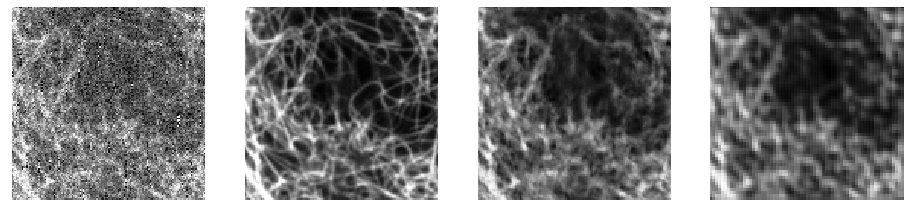

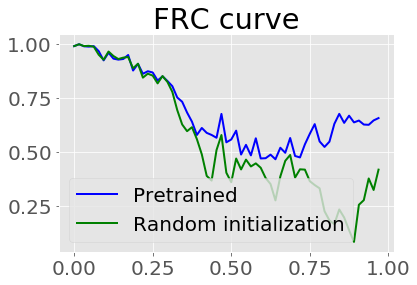

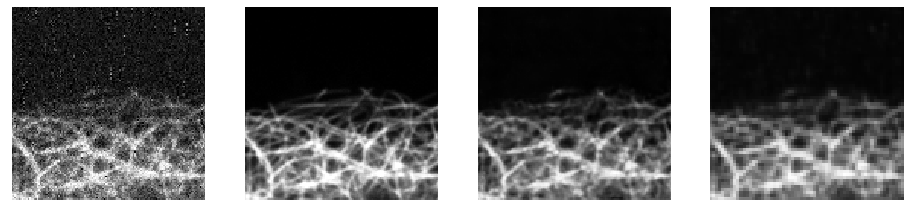

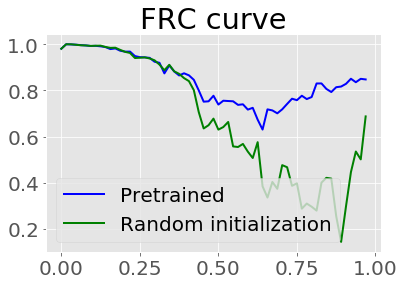

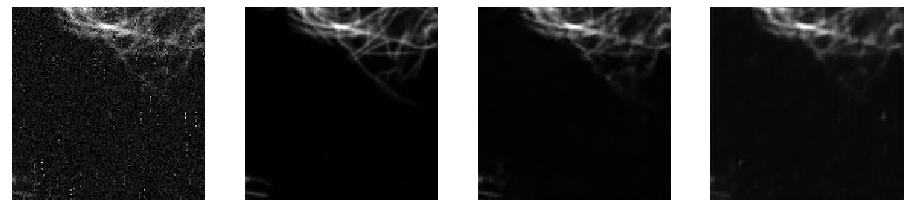

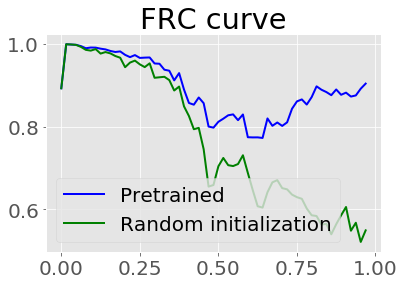

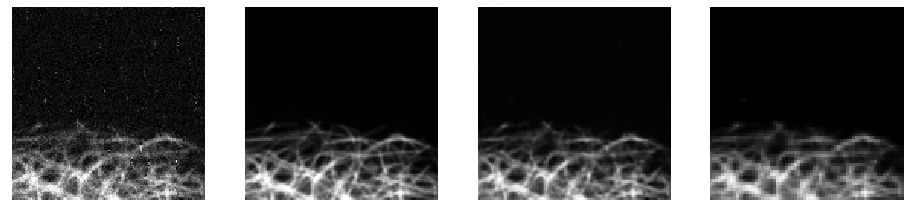

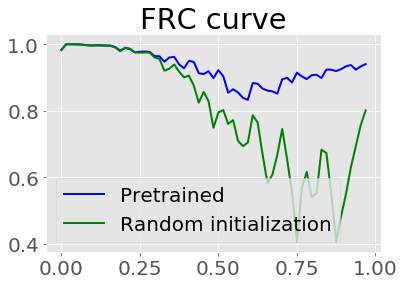

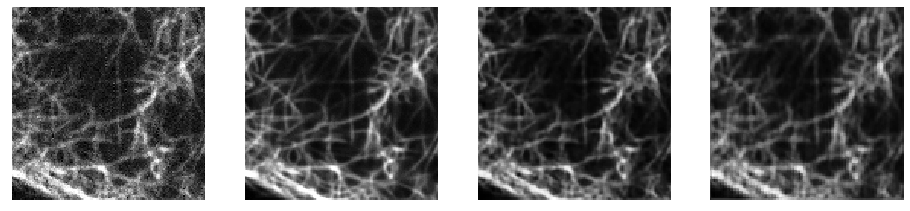

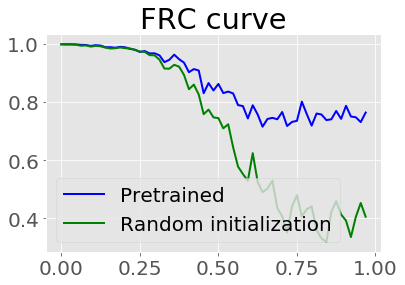

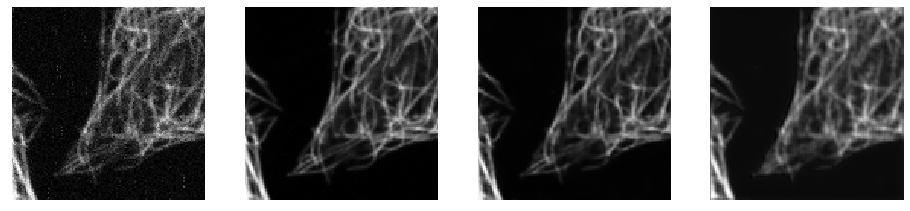

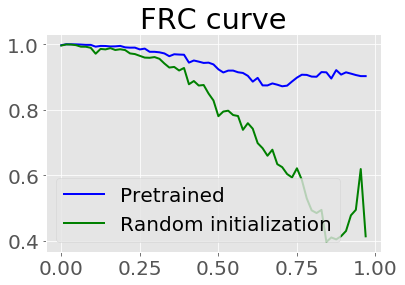

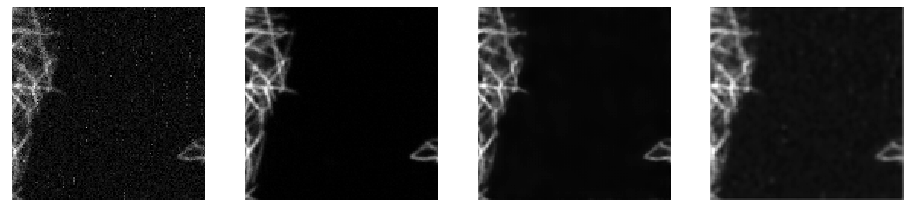

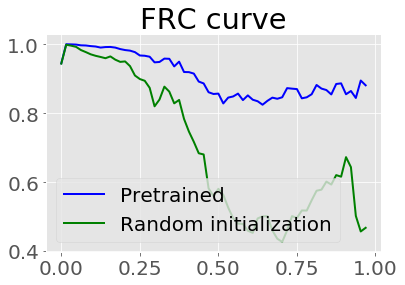

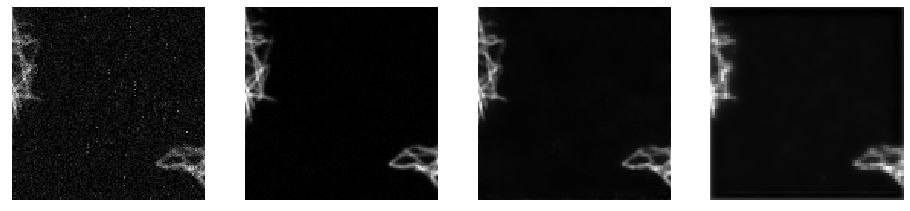

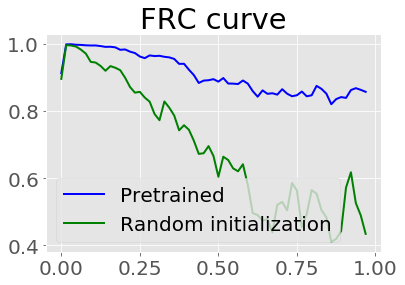

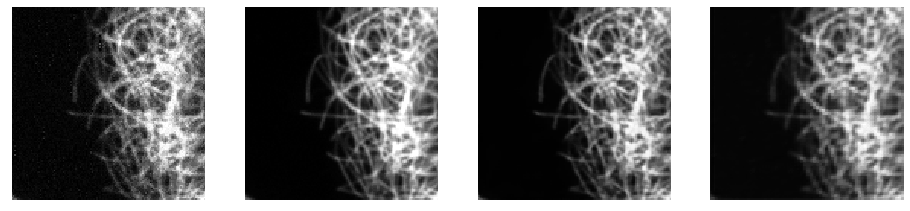

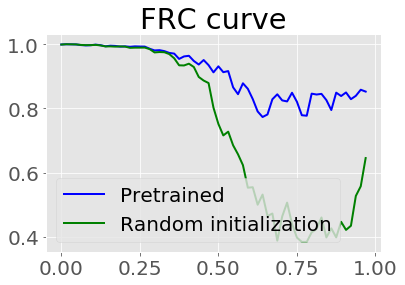

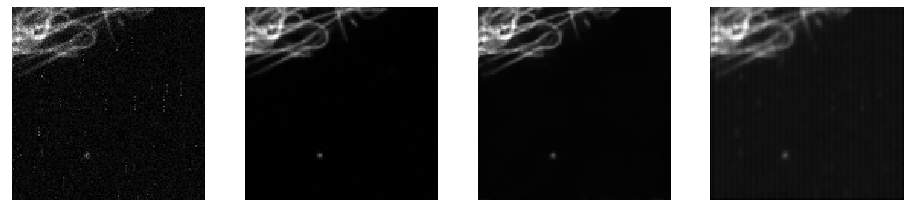

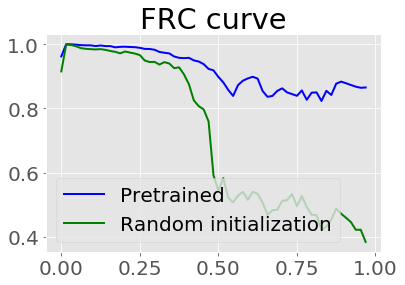

In [19]:
FMD = {}
random = {}
for signal in config['psignal_levels']:
    key_s = signal
    FMD[key_s] = {}
    random[key_s] = {}
    print(f"Running training with {signal} peak signal level...")
    n_epoch = config['n_iters']
    
    for repeat in range(config['repeats']):
        print(f"No. {repeat}...")
        loader, dataset = load_confocal(config['root'], config['train_stat'], config['batch_size'], 
                                        [signal], config['sample_size_list'][0], split_ratio = 0.2, 
                                        types=config['types'], captures=config['captures'],
                                        patch_size=config['patch_size'], loader=tiff_loader)
        noisy = dataset[0]
        clean = dataset[1]
        noisy, clean = noisy.type(torch.FloatTensor).to(device), clean.type(torch.FloatTensor).to(device)

        model_random = Unet()
        model_FMD = Unet()

        model_FMD.load_state_dict(torch.load('./models/FMD_epoch50_model'))

        optimizer_random = Adam(model_random.parameters(), lr=0.001)
        optimizer_FMD = Adam(model_FMD.parameters(), lr=0.0001)

        model_random = model_random.to(device)
        model_FMD = model_FMD.to(device)

        #print("Training: model initialized with FMD dataset training")
        model_FMD = train(model_FMD, loader, config['loss'], optimizer_FMD, n_epoch, \
                          masker, earlystop=True, patience=10, device=device, verbose=True)
        #print("Training: model randomly initialized")
        model_random = train(model_random, loader, config['loss'], optimizer_random, n_epoch, \
                             masker, earlystop=True, patience=10, device=device, verbose=True)

        output_FMD = model_FMD(noisy)
        output_random = model_random(noisy)
        
        # plot example images
        if repeat == 0:
            plot_tensors([noisy[0,0,:], clean[0,0,:], output_FMD[0,0,:], output_random[0,0,:]])

        output_FMD = output_FMD.cpu().detach().numpy()
        output_random = output_random.cpu().detach().numpy()
        noisy = noisy.cpu().detach().numpy()
        clean = clean.cpu().detach().numpy()
        
        if repeat == 0 and True:
            frc_FMD, spatial_freq = frc(output_FMD[0,0,:], clean[0,0,:])
            frc_random, spatial_freq = frc(output_random[0,0,:], clean[0,0,:])
            plt.figure()
            plt.plot( spatial_freq , frc_FMD , '-' , linewidth=2 , color='blue' , label='Pretrained' )
            plt.plot( spatial_freq , frc_random , '-' , linewidth=2 , color='green' , label='Random initialization' )
            plt.legend(loc='lower left')
            plt.title('FRC curve')

        for sample in range(config['sample_size_list'][0]):
            output_random[sample,:] = match_intensity(clean[sample,:], output_random[sample,:])
            output_FMD[sample,:] = match_intensity(clean[sample,:], output_FMD[sample,:])

        quantify(FMD[key_s], config['metrics_key'], clean[0,0, :], output_FMD[0,0,:])
        quantify(random[key_s], config['metrics_key'], clean[0,0, :], output_random[0,0,:])

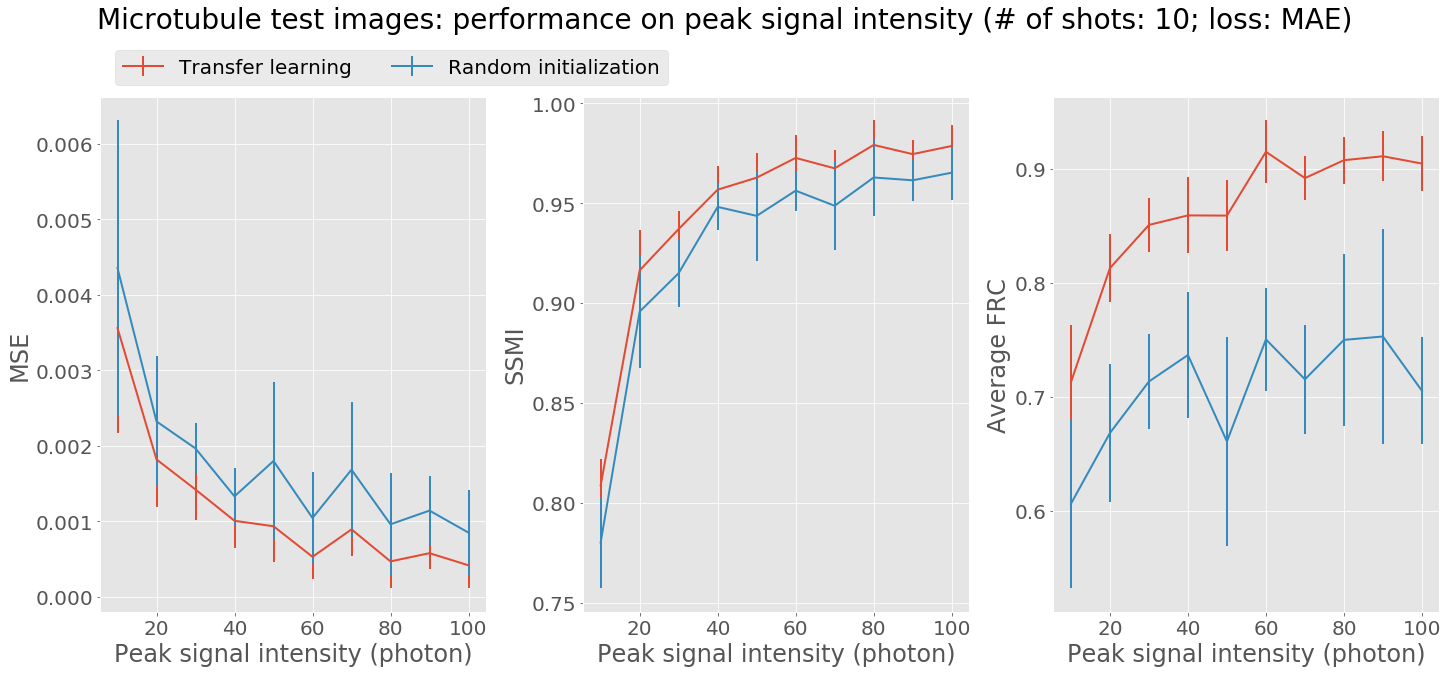

In [20]:
plot_quantifications([FMD,random], ['Transfer learning', 'Random initialization'], config['metrics_key'], 
                     ylabel=['MSE', 'SSMI', 'Average FRC'], xlabel='Peak signal intensity (photon)', 
                     title='Microtubule test images: performance on peak signal intensity (# of shots: 10; loss: MAE)')

In [21]:
name, extension = os.path.splitext(filename)
filename0 = name + str(datetime.datetime.now()) + extension

with open(filename0, 'w') as fd:
    fd.write(json.dumps([FMD, random, config]))